<br><h2> Book Recommendation System </h2>
<br> 
<br> 

**This project utilizes unsupervised machine learning to develop a simple but robust book recommendation system that can deliver personalized book recommendations.  A recommendation system identifies the preferences of a given user and offers relevant suggestions or related content in return. For this recommendation system, the recommender would take input from the user with the name of a given book and delivers highly tailored book recommendations in return. It leverages both content-based and genre-based similarities in providing the final recommendations. Having been trained on a large dataset of books (taken from Goodreads books database) comprised of many different books, authors, genres, reviews, plot summaries and descriptions, it identifies similarities between the input book (given by the user) and other books in the database across all these different dimensions, selects and returns the most similar or most relevant ones. This book recommendation system can also filter, preprocess, and parse text to enable better matching and comparison. It also ensures author variety and can also be easily customized to increase or decrease the number of relevant recommendations or to control the degree to which the recommendations should be content-based or genre-based or a mixture of both. All this, and more, ultimately culminates into a powerful book recommender system that can be used to search for and explore new books based on one's prior preferences and book favorites.**

<br>

**The dataset presented here was taken from Kaggle, which you can access easily by clicking [here](https://www.kaggle.com/datasets/dk123891/books-dataset-goodreadsmay-2024). This dataset consists of thousands of books collected from Goodreads, a popular platform for discovering, reviewing, and discussing books. Indeed, it provides a comprehensive book collection of more than 16,000 books in total, covering a myriad of different authors, genres, and literary eras, ancient and modern. It covers all the major literary works from the ancient times and up to May 2024. Each book featured, represented by a data row, covers important details and descriptions about it, including the book title, author, genre classification, publication date, format, and its average rating score. As such, the data here can support a variety of purposes, from data analysis to studying user-preferences and performing sentiment analysis to building recommendation systems, as with the current case. This dataset has been licensed by MIT for free use for commercial and non-commercial purposes.** <br> 
<br>

**You can view each column and its description in the table below:** <br><br>  

| **Variable**      | **Description**                                                                                         |
| :-----------------| :------------------------------------------------------------------------------------------------------ |
| **book_id**       | Unique identifier for each book in the data                                                             |
| **cover_image_uri**| URI or URL pointing to the cover image of the book                                                     |
| **book_title**    | Title of the book                                                                                       |
| **book_details**  | Details about the book, including summary, plot, synopsis or other descriptive information              |
| **format**        | Details about the format of the book such as whether it's a hardcover, paperback, or audiobook          |
| **publication_info** | Information about the publication of the book including the publisher, publication date, or any other relevant details |
| **authorlink**    |   URI or URL pointing to more information about the author (if available)                               |
| **author**        | Name of the book author(s)                                                                              |
| **num_pages**     | Number of pages                                                                                         |
| **genres**        | Genre labels applying to the book                                                                       |
| **num_ratings**   | Total number of ratings                                                                                 |
| **num_reviews**   | Total number of reviews                                                                                 |
| **average_rating**    | Overall average rating score                                                                        |
| **rating_distribution** | Number of ratings per rating star (for a 5-point rating system)                                   |

<br>
<br>


**To develop the book recommendation system, the dataset is first inspected, cleaned, filtered, and updated in preparation for analysis and model development. After having prepared and analyzed the data, a Term Frequency - Inverse Document Frequency (TF-IDF) vectorizer model is then employed for text vectorization and processing, converting books' important attributes (including author, genres, and plot summary or book description) into numeric vectors with TF-IDF scores capturing and representing each book and how it compares to all others in the dataset. These TF-IDF scores are then compared using cosine distance similarity to measure and map out the overall similarities between the different books, returning a large data matrix with the overall similarities between books. In addition, a separate data matrix is developed for book genres alone to identify and map out the exact genre similarities between the books (using jaccard distance similarity). With the analysis and modeling coming to completion, a book recommendation function is then developed to utilize the similarity matrices obtained in order to deliver tailored book recommendations. As mentioned, this function also features different options to control the nature of the book recommendations such as whether to recommend by genre in particular or by overall similarity more generally and how many books are to be recommended. Finally, the book recommender is put to test, first testing it with well known books (e.g., Shakespeare's 'Macbeth'), then testing it using different book titles sampled at random from the database, and then lastly using user input, in which the user can pass any book they are looking for similar recommendations for and the recommendation function takes care of the rest. You can try the recommender yourself.** <br>

<br>

**Overall, the project is broken down into 7 sections: <br>
&emsp; 1) Reading and Inspecting the Data <br>
&emsp; 2) Cleaning and Updating the Data <br> 
&emsp; 3) Exploratory Data Analysis <br>
&emsp; 4) Feature Engineering: Combining features <br>
&emsp; 5) Text Vectorization and Processing <br>
&emsp; 6) Building a Book Recommendation Function <br>
&emsp; 7) Testing the Recommendation System** <br>

<br>
<br>


In [27]:
#If you're using the executable notebook version, please run this cell first 
# to install the necessary Python libraries for the task 
!pip install numpy 
!pip install pandas 
!pip install matplotlib 
!pip install seaborn 
!pip install scipy
!pip install scikit-learn

In [28]:
#Importing the modules for use 
import re
import math
import requests
import textwrap
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.spatial.distance import squareform, pdist, jaccard
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.simplefilter("ignore")

sns.set_context('paper') 
%matplotlib inline

**Defining Custom Functions**

In [29]:
#Define function to display books by their covers
def get_covers(books_df: pd.DataFrame):
    n_books = len(books_df.index)
    n_cols = ((n_books + 1) // 2) if n_books > 5 else n_books
    n_rows = math.ceil(n_books / n_cols)
    
    #create figure and specify subplot characeristics
    plt.figure(figsize=(4.2*n_cols, 6.4*n_rows), facecolor='whitesmoke')
    plt.subplots_adjust(bottom=.1, top=.9, left=.02, right=.88, hspace=.32)  
    plt.rcParams.update({'font.family': 'Palatino Linotype'})   #adjust font type

    #request, access and plot each book cover 
    for i in range(n_books):
        try:
            response = requests.get(books_df['cover_image_uri'].iloc[i])
        except:
            print('\nCouldn\'t retrieve book cover. Check your internet connection and try again...\n\n', flush=True)
            return
        
        #access and resize image
        img = Image.open(BytesIO(response.content))
        img = img.resize((600, 900))
        
        #shorten and wrap book title
        full_title = books_df['book_title'].iloc[i]
        short_title = re.sub(r'[:?!].*', '', full_title)
        title_wrapped = "\n".join(textwrap.wrap(short_title, width=26))
        
        #plot book cover 
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(img)
        plt.title(title_wrapped, fontsize=21, pad=15)
        plt.axis('off')    
    plt.show()



## Part One: Reading and Inspecting the Data


**Loading and reading the dataset**

In [30]:
#Access and read data into dataframe
df = pd.read_csv('Book_Details.csv', index_col='Unnamed: 0')

#drop unnecessary columns 
df = df.drop(['book_id', 'format', 'authorlink', 'num_pages'], axis=1)


**Inspecting the data**

In [31]:
#report the shape of the dataframe
shape = df.shape
print('Number of coloumns:', shape[1])
print('Number of rows:', shape[0])


Number of coloumns: 10
Number of rows: 16225


In [32]:
#Preview first 5 entries
df.head()

cover_image_uri  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   
2  https://images-na.ssl-images-amazon.com/images...   
3  https://images-na.ssl-images-amazon.com/images...   
4  https://images-na.ssl-images-amazon.com/images...   

                                  book_title  \
0     Harry Potter and the Half-Blood Prince   
1  Harry Potter and the Order of the Phoenix   
2      Harry Potter and the Sorcerer's Stone   
3   Harry Potter and the Prisoner of Azkaban   
4        Harry Potter and the Goblet of Fire   

                                        book_details  \
0  It is the middle of the summer, but there is a...   
1  Harry Potter is about to start his fifth year ...   
2  Harry Potter has no idea how famous he is. Tha...   
3  Harry Potter, along with his best friends, Ron...   
4  It is the summer holidays and soon Harry Potte...   

                    publication_info        author  \
0  ['First published July 16, 2005']  J.K. Rowling   
1  ['First published June 21, 2003']  J.K. Rowling   
2  ['First published June 26, 1997']  J.K. Rowling   
3   ['First published July 8, 1999']  J.K. Rowling   
4   ['First published July 8, 2000']  J.K. Rowling   

                                              genres  num_ratings  \
0  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...      3292516   
1  ['Young Adult', 'Fiction', 'Magic', 'Childrens...      3401709   
2  ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...     10116247   
3  ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...      4215031   
4  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...      3718209   

   num_reviews  average_rating  \
0        58398            4.58   
1        64300            4.50   
2       163493            4.47   
3        84959            4.58   
4        69961            4.57   

                                 rating_distribution  
0  {'5': '2,244,154', '4': '775,028', '3': '219,8...  
1  {'5': '2,178,760', '4': '856,178', '3': '293,2...  
2  {'5': '6,544,542', '4': '2,348,390', '3': '856...  
3  {'5': '2,892,322', '4': '970,190', '3': '287,7...  
4  {'5': '2,500,070', '4': '899,496', '3': '259,7...

**Checking number of entries and data type per column**

In [33]:
#Inspect coloumn headers, data type, and number of entries
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16225 entries, 0 to 16224
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cover_image_uri      16225 non-null  object 
 1   book_title           16225 non-null  object 
 2   book_details         16177 non-null  object 
 3   publication_info     16225 non-null  object 
 4   author               16225 non-null  object 
 5   genres               16225 non-null  object 
 6   num_ratings          16225 non-null  int64  
 7   num_reviews          16225 non-null  int64  
 8   average_rating       16225 non-null  float64
 9   rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.4+ MB


**Descriptive Statistics**

In [34]:
#get overall description of object columns
display(df.describe(include='object').T)
print('\n'+ 80*'_' +'\n')

#get statistical summary of the numerical data
display(df.describe().drop(['25%', '50%', '75%']).apply(lambda x: round(x)))


count unique  \
cover_image_uri      16225  16120   
book_title           16225  15491   
book_details         16177  16018   
publication_info     16225   5369   
author               16225   7615   
genres               16225  13773   
rating_distribution  16225  16093   

                                                                   top freq  
cover_image_uri      https://dryofg8nmyqjw.cloudfront.net/images/no...   38  
book_title                                              The Cheat Code    7  
book_details         Libro usado en buenas condiciones, por su anti...    6  
publication_info                   ['First published January 1, 2008']  360  
author                                                    Stephen King   79  
genres                                                              []  325  
rating_distribution  {'5': '0', '4': '0', '3': '0', '2': '0', '1': ...   12


________________________________________________________________________________



num_ratings  num_reviews  average_rating
count      16225.0      16225.0         16225.0
mean       85785.0       5156.0             4.0
std       320251.0      15776.0             0.0
min            0.0          0.0             0.0
max     10116247.0     274695.0             5.0

Notably here, based on the above descriptions, we can see that we have multiple books duplicated since the total count of book titles doesn't match the total number of unique book titles in the dataset. Second, it seems that some books in the data have no descriptions or details about them since the total number of entries in the `'book_details'` column is lower than all the rest. Finally, can see that many books in the dataset have no specified genre, particularly as 325 of the books featured have an empty list for the genre list column. <br>
As such, consistent with these findings, I will now perform data cleaning and updating in order to deal with each of these issues raised. First, I will drop the books duplicated in the dataset, deal with books lacking details or descriptions about them and then deal with the issue of genre, either updating some of the books by assigning the genre labels common to a particular author, provided that that said author is featured more than twice in the dataset, and, if not, then by removing the books that we couldn't find appropriate genre labels for. This is because genre is a critical factor for deciding on book similarity and recommendation, as the book recommender system to be built will leverage genre similarity not just book content. Finally, I will add a new column for year of publication, which extracts the publication year from the `'publication_info'` column before dropping it as it wouldn't be too important or informative thereafter. <br><br>

## Part Two: Cleaning and Updating the Data 
In this section, I will engage in data cleaning and updating based on the observations and insights reported above in order to prepare the data and render it usable for further analysis and model development.
<br><br>

**Removing duplicate books**

In [35]:
#first, normalize book titles by removing punctuation
df['normalized_title'] = df['book_title'].apply(lambda title: re.sub(r'[^\w\s]', '', title))

#drop duplicate book titles and reset dataframe index
df = df.drop_duplicates(subset='normalized_title', ignore_index=True)


**Dealing with missing or inappropriate book details**

In [36]:
#check the number of books with inappropiate book description or NaN (not a number) values
print('Number of entries with NaN values in the book details column (before): ', df['book_details'].isna().sum())

#fill NaN book details with empty strings
df['book_details'] = df['book_details'].fillna('')

#check the number of entries after 
print('\nNumber of entries with NaN values in the book details column (after): ', df['book_details'].isna().sum())


Number of entries with NaN values in the book details column (before):  48

Number of entries with NaN values in the book details column (after):  0


**Cleaning and updating the `genres` column** 
<br>

After turning the genres into a normal string, I will check the number of empty string and then assign the closest genre labels by author; otherwise, if no genre labels were found, I will delete these books with no genre.

In [37]:
#Changing string list to list then to string with the genres of books
df['genres'] = df['genres'].apply(lambda x: ', '.join(eval(x)))


In [38]:
#Updating rows with no genre
#get indices of books with no genre labels
no_genre_before = df[df['genres'].str.len() == 0].index

#we can preview the books identified
df.iloc[no_genre_before, 1:8].head(3)


book_title  \
570                 Angels & Guides Healing Meditations   
2749                                    La Santa Muerte   
4399  Rush Hudson Limbaugh and His Times: Reflection...   

                                           book_details  \
570   You’ll find a new level of comfort, safety, an...   
2749  Narcotraficantes, políticos, delincuentes, emp...   
4399  This series of interviews with Rush H. Limbaug...   

                           publication_info          author genres  \
570   ['First published September 1, 2006']   Sylvia Browne          
2749   ['First published January 31, 2004']  Homero Aridjis          
4399   ['First published November 1, 2003']   Rush Limbaugh          

      num_ratings  num_reviews  
570            53            1  
2749           29            5  
4399            6            0

In [39]:
#Get total number of books with no genre before the update
print('Total number of entries with missing genre (before): ', len(df.iloc[no_genre_before]))

#change empty strings with genres common to given author
for i in no_genre_before:
    genre_labels = df[df['author']==df['author'].iloc[i]]['genres'].iloc[0]
    if len(genre_labels) > 0:
        df.at[i, 'genres'] = genre_labels
    else:
        df.drop(index=i, inplace=True)
#resetting dataframe index
df.reset_index(drop=True, inplace=True)

#check number of books with no genre after the update
no_genre_after = df[df['genres'].str.len() == 0].index
print('\nTotal number of entries with missing genre (after): ', len(df.iloc[no_genre_after]))


Total number of entries with missing genre (before):  319

Total number of entries with missing genre (after):  0


Now finally, in dealing with genre, I will try to make sure that some genres do not conflict with one another. Particularly, I'm going to make sure that if one book is has Fiction as one of its genre labels it does not simultaneously be classified as 'Nonfiction' as well, as this would mix up some of the recommendations. First, let's preview some of the books that suffer from this issue.
<br>

**Dealing with conflicting book genres**

In [40]:
#create empty list for storing indices of books with conflicting genres and set count to zero
indices=[]
count=0
#loop over and return all books with conflicting genres
for genre_string, title in zip(df['genres'], df['book_title']):
    if 'Fiction' in genre_string and 'Nonfiction' in genre_string:
        count += 1
        indices.append(df[df['book_title']==title].index)
        print(f'{count}. {title} // {genre_string}')


1. If I Die in a Combat Zone, Box Me Up and Ship Me Home // Nonfiction, War, History, Memoir, Military Fiction, Biography, Biography Memoir
2. Dispatches // Nonfiction, History, War, Memoir, Journalism, Military Fiction, Military History
3. The Last Stand of the Tin Can Sailors: The Extraordinary World War II Story of the U.S. Navy's Finest Hour // History, Nonfiction, Military Fiction, World War II, War, Military History, Naval History
4. Jesus Freaks: Stories of Those Who Stood for Jesus, the Ultimate Jesus Freaks // Christian, Nonfiction, Biography, Christianity, Religion, Faith, Christian Non Fiction
5. Flags of Our Fathers // History, Nonfiction, Military Fiction, War, World War II, Biography, Military History
6. The March of Folly // History, Nonfiction, Politics, War, World History, Military History, Military Fiction
7. The Art of War // Nonfiction, Philosophy, History, War, Business, Classics, Military Fiction
8. In Pharaoh's Army: Memories of the Lost War // Memoir, Nonfiction

As demonstrated, most of the books featured here tend to be books about historical wars, persumably with an element of fiction, hence they tend to be classified as 'Nonfiction' and simultaneously as 'Military Fiction'. We also have a few books classified as both 'Nonfiction' and 'Literary Fiction'. Similarly, there's at least one book classified as both 'Nonfiction' and 'Realistic Fiction'. These seem to be literary works with a mixture of both indeed. And finally, we have a few other books classified as 'Nonfiction' and 'Christian Non Fiction'. Now, in order to deal with this, I will simply replace 'Military Fiction' with 'Military' and 'Literary Fiction' with 'Literary'. Finally, for the purposes of accurate text processing, I will change the genre label 'Christian Non Fiction' to simply 'Christian Nonfiction', joining the last two words together.
<br>

In [41]:
#create dictionary with sub-strings to be replaced or removed
replacements_dict = { 'Military Fiction': 'Military',
                      'Literary Fiction': 'Literary',
                      'Realistic Fiction': 'Realistic',
                      'Non Fiction': 'Nonfiction' }

#replace substrings according to specified values
df['genres'] = df['genres'].replace(replacements_dict, regex=True)

#Now we can check again
count=0
for genre_string, title in zip(df['genres'], df['book_title']):
    if 'Fiction' in genre_string and 'Nonfiction' in genre_string:
        count += 1
print(f'Number of books with conflicting genres:  {count}')


Number of books with conflicting genres:  0


**Creating a column with publication year**

In [42]:
#Changing string list in publication info column to normal string
df['publication_info'] = df['publication_info'].apply(lambda x: eval(x)[0] if len(eval(x)) > 0 else 'n.d.')

#extract year of publication from publication info column and assign it to a new data column, 'publication_year' (if 'n.d.' assign an empty string)
df['publication_year'] = df['publication_info'].str.extract(r'(\d{1,4}$)').fillna('')

#preview changes and new publication year column
df[['publication_info', 'publication_year']].sample(5)


publication_info publication_year
547   First published December 1, 1980             1980
7195   First published January 1, 1937             1937
8293   First published January 1, 1798             1798
1428      First published June 7, 1926             1926
6407  First published January 28, 2003             2003

## Part Three: Exploratory Data Analysis 
<br>

In this section, I will explore the dataset in more detail, performing some further data analysis and visualization to get familiar with the data and delineate some of the underlying relationships. I will examine the most common book genres in the data, the most top rated books, the rating distribution and the relationship between user ratings and user reviews.
<br>
<br>

**Top 20 book genres featured in the data**



In [43]:
#Create one-hot encoded dataframe with all unique genres in the data
genres_df = df['genres'].str.get_dummies(', ').astype(int)

#preview genres dataframe
genres_df.head()


12th Century  13th Century  15th Century  16th Century  17th Century  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   18th Century  19th Century  1st Grade  20th Century  21st Century  ...  \
0             0             0          0             0             0  ...   
1             0             0          0             0             0  ...   
2             0             0          0             0             0  ...   
3             0             0          0             0             0  ...   
4             0             0          0             0             0  ...   

   X Men  Yaoi  Young Adult  Young Adult Contemporary  Young Adult Fantasy  \
0      0     0            1                         0                    0   
1      0     0            1                         0                    0   
2      0     0            1                         0                    0   
3      0     0            1                         0                    0   
4      0     0            1                         0                    0   

   Young Adult Historical Fiction  Young Adult Paranormal  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   Young Adult Romance  Zimbabwe  Zombies  
0                    0         0        0  
1                    0         0        0  
2                    0         0        0  
3                    0         0        0  
4                    0         0        0  

[5 rows x 727 columns]

We can see here we have a total of 727 unique genre classifications! Now, I will identify and present the top 20 most features book genres.

<Axes: >

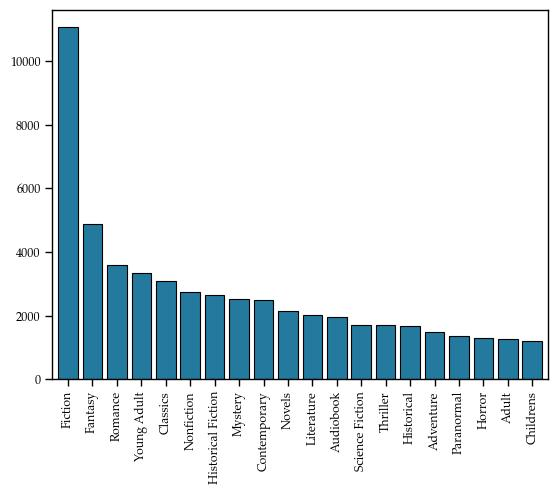

In [44]:
#Extract top 20 genres by genre frequency
top20_genres = genres_df.sum().sort_values(ascending=False)[:20]

#Visualize top 20 genres using bar chart
top20_genres.plot(kind='bar', color='#24799e', width=.8, 
                      linewidth=.8, edgecolor='k', rot=90)


**Top 10 books on Goodreads**

In [45]:
#Assign appropriate data type to the rating distribution column
df['rating_distribution'] = df['rating_distribution'].apply(lambda x: eval(x))

#get total number of five star ratings per book from the rating distribution column
df['total_5star_ratings'] = [int(dic['5'].replace(',','')) for dic in df['rating_distribution']]

#sort data by books with highest frequency of 5 star ratings
top10_books = df.sort_values(by='total_5star_ratings', ascending=False).iloc[:10][['book_title', 'author', 'genres', 'cover_image_uri']].reset_index(drop=True)

#report the results table
top10_books.iloc[:,:3]


book_title           author  \
0     Harry Potter and the Sorcerer's Stone     J.K. Rowling   
1                          The Hunger Games  Suzanne Collins   
2                     To Kill a Mockingbird       Harper Lee   
3  Harry Potter and the Prisoner of Azkaban     J.K. Rowling   
4      Harry Potter and the Deathly Hallows     J.K. Rowling   
5       Harry Potter and the Goblet of Fire     J.K. Rowling   
6                    The Fault in Our Stars       John Green   
7                                  Twilight  Stephenie Meyer   
8                       Pride and Prejudice      Jane Austen   
9   Harry Potter and the Chamber of Secrets     J.K. Rowling   

                                              genres  
0  Fantasy, Fiction, Young Adult, Magic, Children...  
1  Young Adult, Fiction, Fantasy, Science Fiction...  
2  Classics, Fiction, Historical Fiction, School,...  
3  Fantasy, Fiction, Young Adult, Magic, Children...  
4  Fantasy, Young Adult, Fiction, Magic, Children...  
5  Fantasy, Young Adult, Fiction, Magic, Children...  
6  Young Adult, Fiction, Contemporary, Realistic,...  
7  Fantasy, Young Adult, Romance, Fiction, Vampir...  
8  Fiction, Historical Fiction, Historical, Liter...  
9  Fantasy, Fiction, Young Adult, Magic, Children...

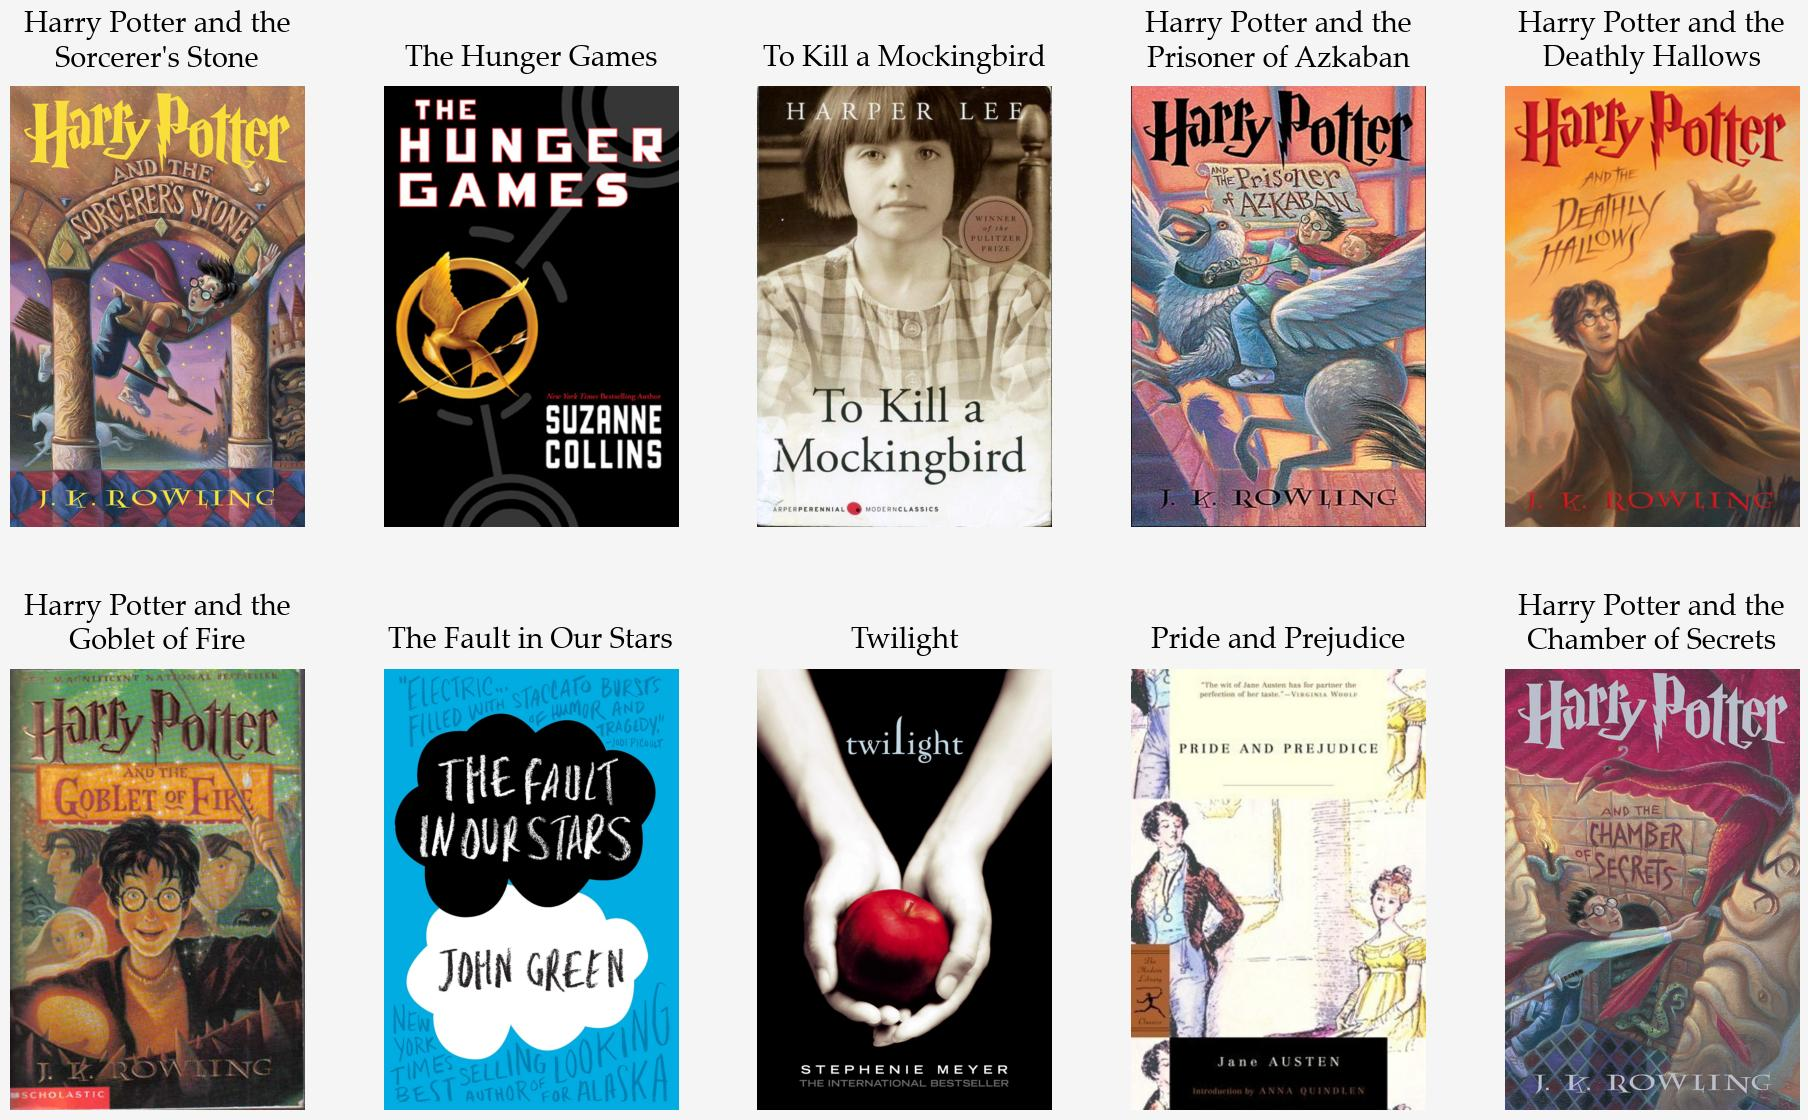

In [46]:
#get and display books by cover
get_covers(top10_books)


**Distribution of rating scores**

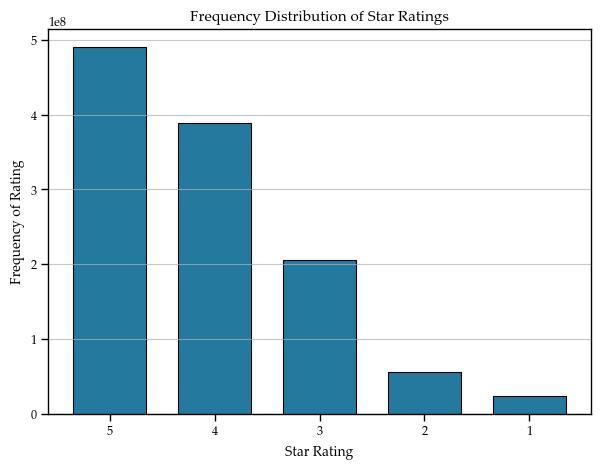

In [47]:
#Aggregate ratings by rating star 
rating_counts = {'5':0, '4':0, '3':0, '2':0, '1':0}
for ratings in df['rating_distribution']:
    for key, value in ratings.items():
        rating_counts[key] += int(value.replace(',',''))

#plot the ratings frequency distribution
plt.figure(figsize=(7,5))
plt.bar(rating_counts.keys(), rating_counts.values(), color='#24799e', width=.7, linewidth=.8, edgecolor='k')
plt.title('Frequency Distribution of Star Ratings', fontsize=11)
plt.xlabel('Star Rating', fontsize=10)
plt.ylabel('Frequency of Rating', fontsize=10)
plt.grid(axis='y', linestyle='-', alpha=.7)
plt.show()


**Relationship between number of ratings and average rating score**


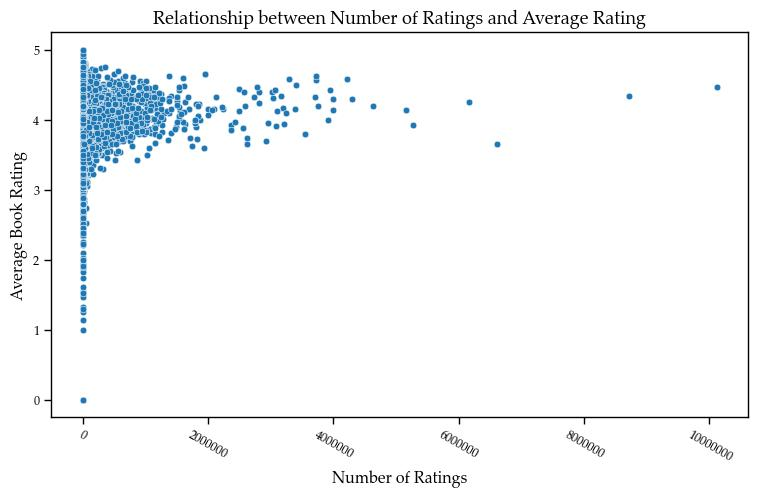

In [48]:
#Visualize the relationship between the number of ratings and the average rating 
# score for a given book using scatter plot
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='num_ratings', y='average_rating')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=-30)
plt.title('Relationship between Number of Ratings and Average Rating', fontsize=13)
plt.xlabel('Number of Ratings', fontsize=11.5)
plt.ylabel('Average Book Rating', fontsize=11.5)
plt.show()


As depicted by the above plot, there is a positive relationship between the number of ratings and the average rating score of a given book. Users generally tend to give more ratings if find the book favorable and deserving of a high rating score. Now that gathered an overview of the data, I will next move to performing an important feature engineering step to prepare the data for modeling and text processing, particularly, I will create a new column, `'combined_features'` that combines all the important book features together, which would be crucial for subsequent analysis applying text vectorization and processing.

## Part Four: Feature Engineering—Combining Features
<br>

In [49]:
#Combine features for ovarall text processing
df['combined_features'] = (df['book_title'] + ' / ' + df['author'] + ' / ' + df['publication_year'] + ' / ' + df['genres'] + ' / ' + df['average_rating'].apply(lambda x: str(x)) + ' / ' + df['book_details'])

#Preview a sample of the combined features column
for row in df['combined_features'].sample(5):
    print(row[:200],'\n')


Inkspell / Cornelia Funke / 2005 / Fantasy, Young Adult, Fiction, Middle Grade, Childrens, Adventure, Magic / 3.94 / The captivating sequel to INKHEART, the critically acclaimed, international bestsel 

The Stone Raft / José Saramago / 1986 / Fiction, Portugal, Magical Realism, Literature, Portuguese Literature, Nobel Prize, Novels / 3.82 / When the Iberian Peninsula breaks free of Europe and begins  

The Gods of Mars / Edgar Rice Burroughs / 1913 / Science Fiction, Fantasy, Fiction, Classics, Adventure, Pulp, Science Fiction Fantasy / 3.88 / After the long exile on Earth, John Carter finally retur 

The Second Korean War / Ted Halstead / 2018 / Fiction, War, Military / 4.15 / "This book was like Tom Clancy reincarnated. Ted Halstead really knows how to write a thriller. Can't wait for more!"Two R 

All Dreamers Go to America / Ana Ingham / 2009 / Drama, Novels, Fiction, Contemporary / 4.23 / Ana Ingham's delightful novel, All Dreamers Go to America, is a wonderful tale about a young 

## Part Five: Text Vectorization and Processing 
<br>

In this section, I will employ TF-IDF to perform text vectorization, weighting the importances of terms in relation to the description of a single book and relative to the descriptions of other books. The TF-IDF vectorizer would also be supplied with different checks and measures to process text better, standardizing terms, filtering out the most common terms and meaningless terms or typos, and so on. The vectorizer would then return a data matrix with all the terms and term weights per book which would then be utilized for further analysis. Particularly, the next step would be to measure and quanity the similarities between books based off the obtained data matrix. As such, to identify the similarities between the books, I will proceed by using the cosine distance similarity metric to measure term similarities across the different books in the data. A cosine similarity of 1 should indicate identity, or, in this context, maximum overall similarity, whilst cosine similarity of 0 should indicate zero commonality. The resulting *similarity matrix* would represent the overall similarities between the different books in the dataset. This would cover all the important features of a book, including the author, book genres, and plot summary or description, as depicted by the `'combined_features'` column defined above. Finally, a separate similarity matrix will be created for genre alone. To identify genre similarities, I will employ jaccard distance which would quantify the genre commonalities/uncommonalities across the books in the dataset. This would enable us to improve and better tailor book recommendations by leveraging genre similarity along with overall similarity.
<br>
<br>

In [50]:
#Define custom tokenizer to process text better
def my_tokenizer(text):
    #Remove punctuation and standardize text (all in lowercase, no whitespace)
    tokens = re.findall(r'\b\w+\b', text.lower().strip())
    return tokens


**Identifying overall similarity: Text vectorization with TF-IDF**

In [51]:
#Create TF-IDF object and set text vectorization characteristics
tfidf_vectorizer = TfidfVectorizer(stop_words='english',   #remove common english words (e.g., the, then)
                                   tokenizer=my_tokenizer,   #specify text tokenizer (to process and standardize terms)
                                    ngram_range=(1,2),      #specify n-gram range
                                    min_df=2)      #specify min_df to filter out uncommon terms 

#fit and transform the data to get a TF-IDF matrix
tfidf_mtrx = tfidf_vectorizer.fit_transform(df['combined_features'])

#Now computing cosine distance similarity
#calculate cosine distance similarity to obtain similarity matrix
similarity_mtrx = cosine_similarity(tfidf_mtrx, tfidf_mtrx)



**Identifying genre similarity** <br>
Now I will create a similarity matrix for genre alone (using jaccard distance similarity). First, I will turn my genres dataframe into a sparse matrix for faster processing and then compute the jaccard distance similarity to obtain a similarity matrix for genre alone.


In [52]:
#Convert genres_df to CSR matrix
genres_csr_mtrx = csr_matrix(genres_df.values).astype(bool).toarray()

#Compute jaccard distance similarity and return jaccard similarity matrix
genre_sim_mtrx = 1 - squareform(pdist(genres_csr_mtrx, metric=jaccard))

#normalize jaccard distance scores
genre_sim_mtrx = genre_sim_mtrx / np.max(genre_sim_mtrx) if np.max(genre_sim_mtrx) > 0 else genre_sim_mtrx


Now with all the data processed and analyzed throughly, I will build the main function for tailoring and delivering book recommendations.

## Part Six: Building a Book Recommendation Function
<br>

In this section, I will develop a custom function for delivering personalized book recommendations. This function will constitute the heart of the book recommendation system. It will take a book title as input and return the most relevant book recommendations based off that book, utilizing and balancing the similarity matrices obtained, leveraging overall similarity as well as genre similarity. It will also be supplied with a special parameter, `alpha`, which specifies the exact balance between the two matrices, i.e., whether the recommendations should be tailored by genre similarity alone or overall similarity, or a mixture of both, and, if so, to which extent. It's will also feature another parameter, `N`, which specifies the exact number of book recommendations to return. The output would be a data table rendering the recommendation results as well as displaying each book by its cover in a sequential order. You can read the function's documentation for more details.
<br>
<br>

In [53]:
#Define helper functions to return book recommendations
def Get_Recommendations(title: str, sim_mtrx: np.ndarray, genre_sim_mtrx: np.ndarray, alpha=0.5, N=10):
    """
    This function takes a book title and recommends similar books that cover similar themes
    or fall within the same genre categories.

    Parameters:
    - title (str): The title of the book for which recommendations are sought.
    - sim_mtrx (ndarray): A similarity matrix based on book overall similarities, where each
      row corresponds to a book and each column corresponds to its cosine similarity score
      with other books.
    - genre_sim_mtrx (ndarray): A similarity matrix based on book genres, where each row
      corresponds to a book and each column corresponds to its jaccard similarity score with
      other books based on genre.
    - alpha (float, optional): Weighting factor for combining overall similarity and genre
      similarity. Defaults to 0.5, balancing overall similarity and genre similarity together.
    - N (int, optional): Number of recommendations to return. Defaults to 10.

    Returns:
    - Data table (Series) with recommended books and plot of each book with its cover.

    Raises:
    - TypeError: If the title provided is not a string.

    Notes:
    - This function filters, preprocesses and standardizes the book titles given, identifies its genre
      categories, importantly, identifying whether it's Fiction or Nonfiction work to prevent genre
      overall while looking for recommendations.
    - It looks for book recommendations by combining similarity scores from two matrices: sim_mtrx
      (based on overall similarities) and genre_sim_mtrx (based on genres).
    - It prioritizes books with similar genre categories; otherwise, it recommends book based on
      overall book similarity.
    - Finally, recommendations are filtered to include books by a different variety of authors, limiting
      the number of recommendations to only 5 books per one author.
    - The number of book recommendations can be adjusted using the 'N' parameter. Default is 10 book recommendations.
    """

    #check if title provided is of the correct data type (string)
    try:
        curr_title = str(title)
    except:
        raise TypeError('Book title entered is not string.')

    #standardize titles for accurate comparisons
    title = curr_title.lower().strip()
    full_titles = df['book_title'].apply(lambda title: title.lower().strip())
    partial_titles = full_titles.str.extract(r'^(.*?):')[0].dropna()

    #check if provided title matches book title in the dataset and get index if found
    if title in full_titles.values:
        indx = df[full_titles == title].index[0]

    elif title in set(partial_titles.values):
        indx_partial = partial_titles[partial_titles == title].index[0]
        indx = df[df['book_title'] == df['book_title'].iloc[indx_partial]].index[0]

    else:
        #try normalizing book titles across the board by removing punctuations and removing 'the' if the book starts with it for better comparisons
        normalized_title = re.sub(r'(^\s*(the|a)\s+|[^\w\s])', '', title, flags=re.IGNORECASE)
        normalized_full_titles = full_titles.apply(lambda title: re.sub(r'(^\s*(the|a)\s+|[^\w\s])', '', title, flags=re.IGNORECASE))
        normalized_partial_titles = partial_titles.apply(lambda title: re.sub(r'(^\s*(the|a)\s+|[^\w\s])', '', title, flags=re.IGNORECASE))
        if normalized_title in normalized_full_titles.values:
            indx = df[normalized_full_titles == normalized_title].index[0]

        elif normalized_title in set(normalized_partial_titles.values):
            indx_partial = normalized_partial_titles[normalized_partial_titles==normalized_title].index[0]
            indx = df[df['book_title'] == df['book_title'].iloc[indx_partial]].index[0]

        else:
            print(f'\nBook with title \'{curr_title}\' is not found. Please try a different book.\n', flush=True)
            return False


    #Check if 'Fiction' is in the genre of the selected book
    is_fiction = 'Fiction' in df['genres'].iloc[indx]

    #Find books with the same genre category
    if is_fiction:
        book_indices_ByGenre = [i for i in df.index if ('Fiction' in df['genres'].iloc[i]) and (i != indx)]
    else:
        book_indices_ByGenre = [i for i in df.index if ('Fiction' not in df['genres'].iloc[i] or 'Nonfiction' in df['genres'].iloc[i]) and (i != indx)]


    #Combine the two similarity matrices using weighted sum
    weighed_similarity = (alpha * sim_mtrx[indx]) + ((1 - alpha) * genre_sim_mtrx[indx])

    #Get cosine similarity scores for books with the same genre
    similarity_scores = [(i, weighed_similarity[i]) for i in book_indices_ByGenre]

    #Filter scores to only include books with the same genre category
    similarity_scores = [score for score in similarity_scores if score[0] in book_indices_ByGenre]

    #Sort the books based on the genre similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    #If less than N books are found in the same genre category, add books by closest overall cosine distance
    if len(similarity_scores) < N:
        cos_scores = list(enumerate(weighed_similarity[indx]))
        cos_scores = sorted(cos_scores, key=lambda x: x[1], reverse=True)
        cos_scores = [score for score in cos_scores if score[0] != indx and score[0] not in [x[0] for x in similarity_scores]]  #Exclude the same book and already recommended books
        similarity_scores += [score for score in cos_scores if score not in similarity_scores][:N - len(similarity_scores)]

    #Limit recommendations to 5 books per author
    author_counts = {}
    similarity_scores_filtered = []
    for score in similarity_scores:
        author = df['author'].iloc[score[0]]
        if author not in author_counts or author_counts[author] < 5:
            similarity_scores_filtered.append(score)
            author_counts[author] = author_counts.get(author, 0) + 1


    #Get the scores of the N most similar books
    most_similar_books = similarity_scores_filtered[:N]
    #Get the indices of the books selected
    most_similar_books_indices = [i[0] for i in most_similar_books]

    #Prepare DataFrame with recommended books and their details
    recommended_books = df.iloc[most_similar_books_indices][['book_title', 'author', 'cover_image_uri']]
    recommended_books['Recommendation'] = recommended_books.apply(lambda row: f"{row['book_title']} (by {row['author']})", axis=1)
    recommended_books.reset_index(drop=True, inplace=True)

    #Return book recommendations
    print(f"\nRecommendations for '{curr_title.title()}' (by {df['author'].iloc[indx]}):", flush=True)
    display(recommended_books['Recommendation'].to_frame().rename(lambda x:x+1))
    print('\n', flush=True)
    get_covers(recommended_books)
    return


## Part Seven: Testing the Recommendation System
<br>

Finally, in this last section I will test out the recommendation system. This will unfold in three steps. First, I will test the recommender by passing a popular book title to the function, such as Shakespeare's Macbeth, and execute it to obtain the relevant book recommendations. Second, I will obtain a sample of books picked at random from the dataset and pass them to the function to obtain and evaluate the recommendations for each. And finally, I will develop a function that takes book titles from the user as input and return the relevant book recommendations when available.
<br>
<br>

In [54]:
#Adjust pandas display settings to display entire column
pd.set_option('display.max_colwidth', None)

**Generating Book Recommendation for Famous Title**


Recommendations for 'Macbeth' (by William Shakespeare):


Recommendation
1                                               Hamlet (by William Shakespeare)
2                                              Othello (by William Shakespeare)
3                                            King Lear (by William Shakespeare)
4                                     Romeo and Juliet (by William Shakespeare)
5                               The Merchant of Venice (by William Shakespeare)
6          Hamlet: Screenplay, Introduction And Film Diary (by Kenneth Branagh)
7                                    Doubt, a Parable (by John Patrick Shanley)
8   The Oedipus Cycle: Oedipus Rex, Oedipus at Colonus, Antigone (by Sophocles)
9                                                    Oedipus Rex (by Sophocles)
10                                                      Antigone (by Sophocles)

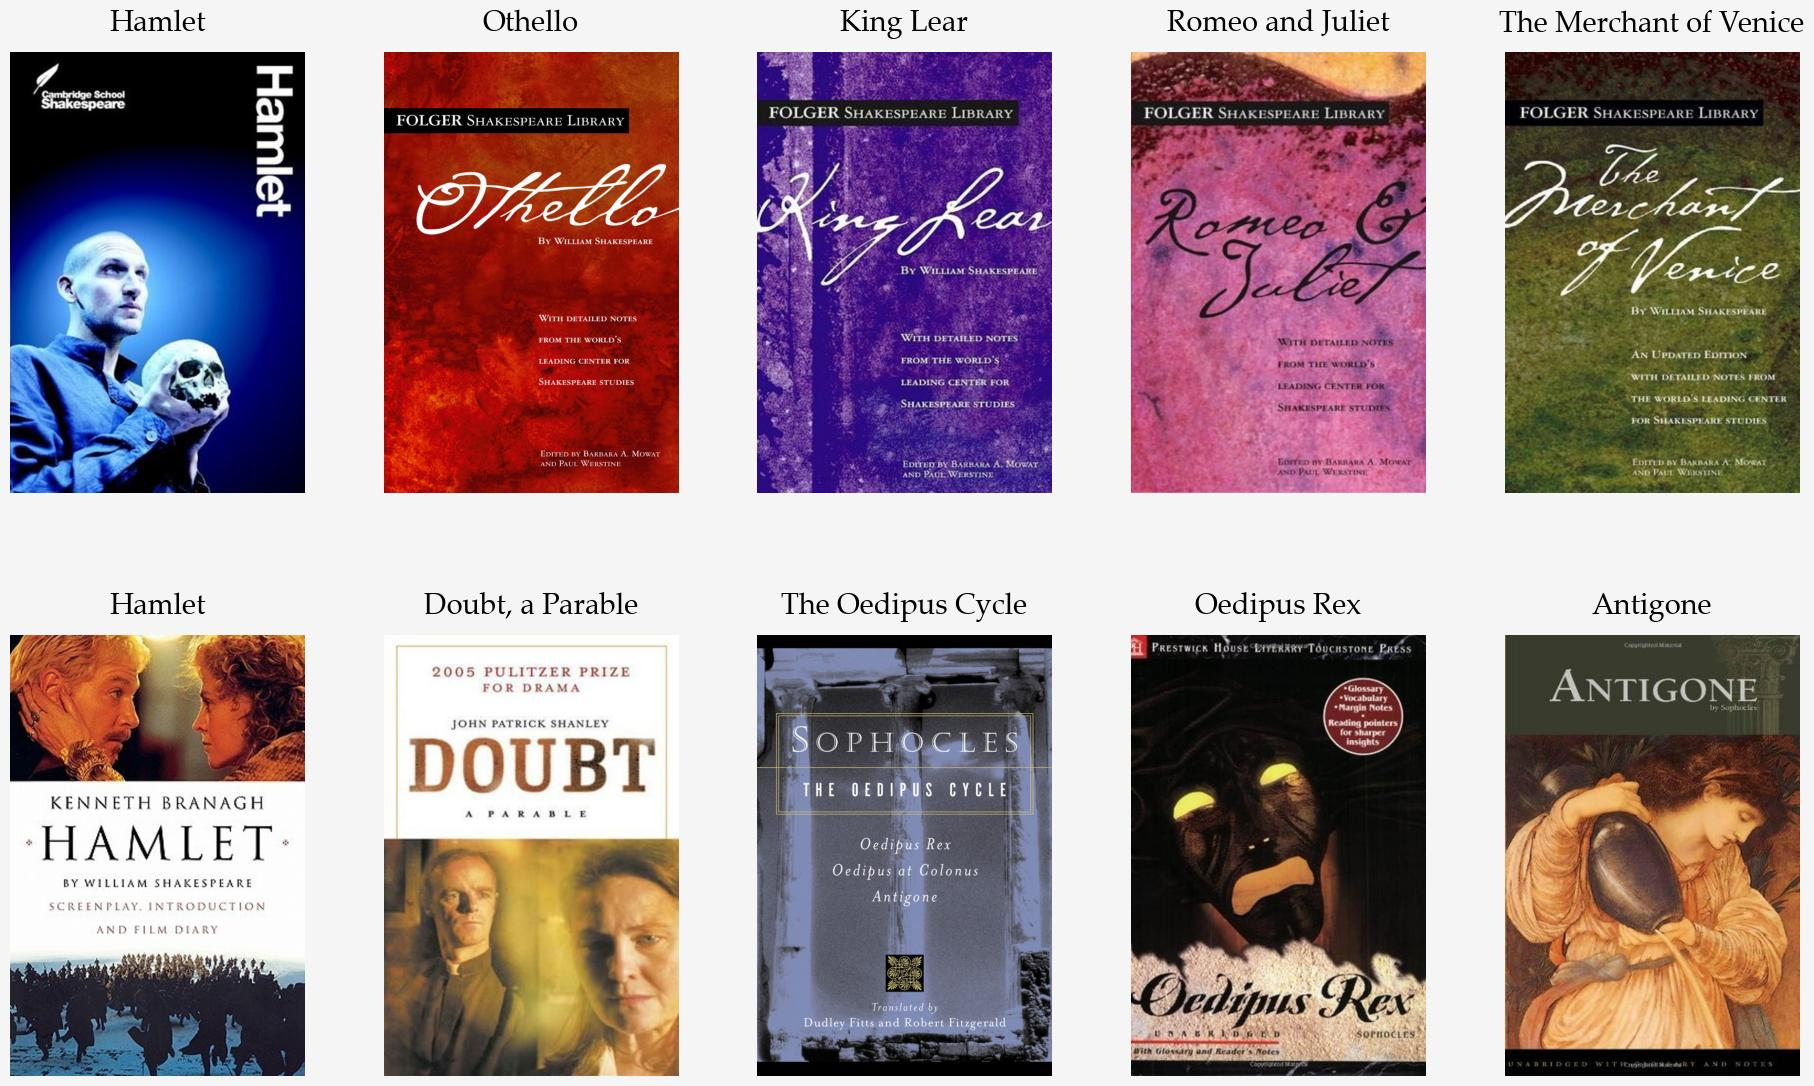

In [55]:
#Get 10 book recommendations for 'Macbeth' (by Shakespeare)
book_title = 'Macbeth'
Get_Recommendations(book_title, similarity_mtrx, genre_sim_mtrx, alpha=0.7, N=10)


<br><br>

**Generating Book Recommendations from Random Titles**


Recommendations for 'Persuader' (by Lee Child):


Recommendation
1                                        One Shot (by Lee Child)
2                                 Nothing to Lose (by Lee Child)
3                            Bad Luck and Trouble (by Lee Child)
4                                 Worth Dying For (by Lee Child)
5                                        Tripwire (by Lee Child)
6   Dragan Radelscu & The Vampires Of Paris (by Shamus Sherwood)
7                            Face of a Killer (by Robin Burcell)
8                      The Nowhere Man (by Gregg Andrew Hurwitz)
9                            The Lion's Game (by Nelson DeMille)
10                              Saving Faith (by David Baldacci)

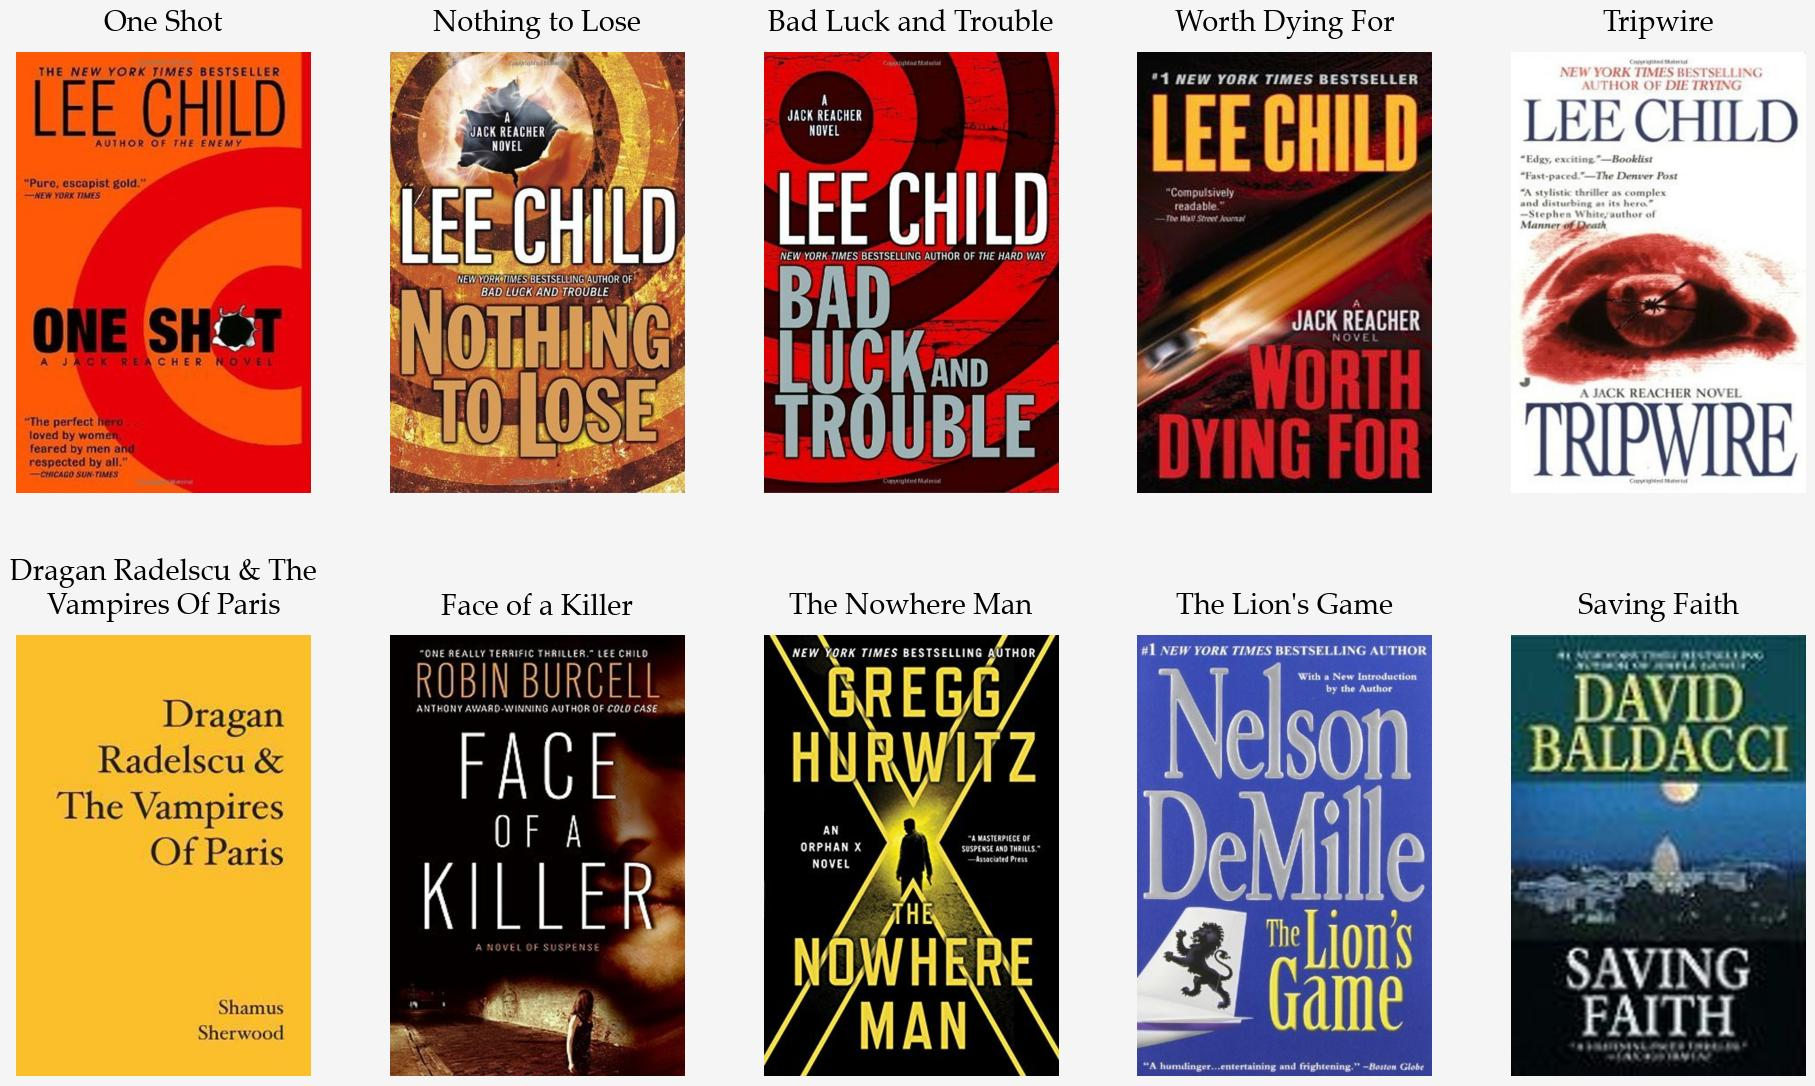


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Silent Night 2' (by R.L. Stine):


Recommendation
1                Silent Night (by R.L. Stine)
2             All-Night Party (by R.L. Stine)
3                    The Face (by R.L. Stine)
4          The Secret Bedroom (by R.L. Stine)
5   Night of the Living Dummy (by R.L. Stine)
6   After the First Death (by Robert Cormier)
7          Greenglass House (by Kate Milford)
8             Frozen Charlotte (by Alex Bell)
9    172 Hours on the Moon (by Johan Harstad)
10             Full Tilt (by Neal Shusterman)

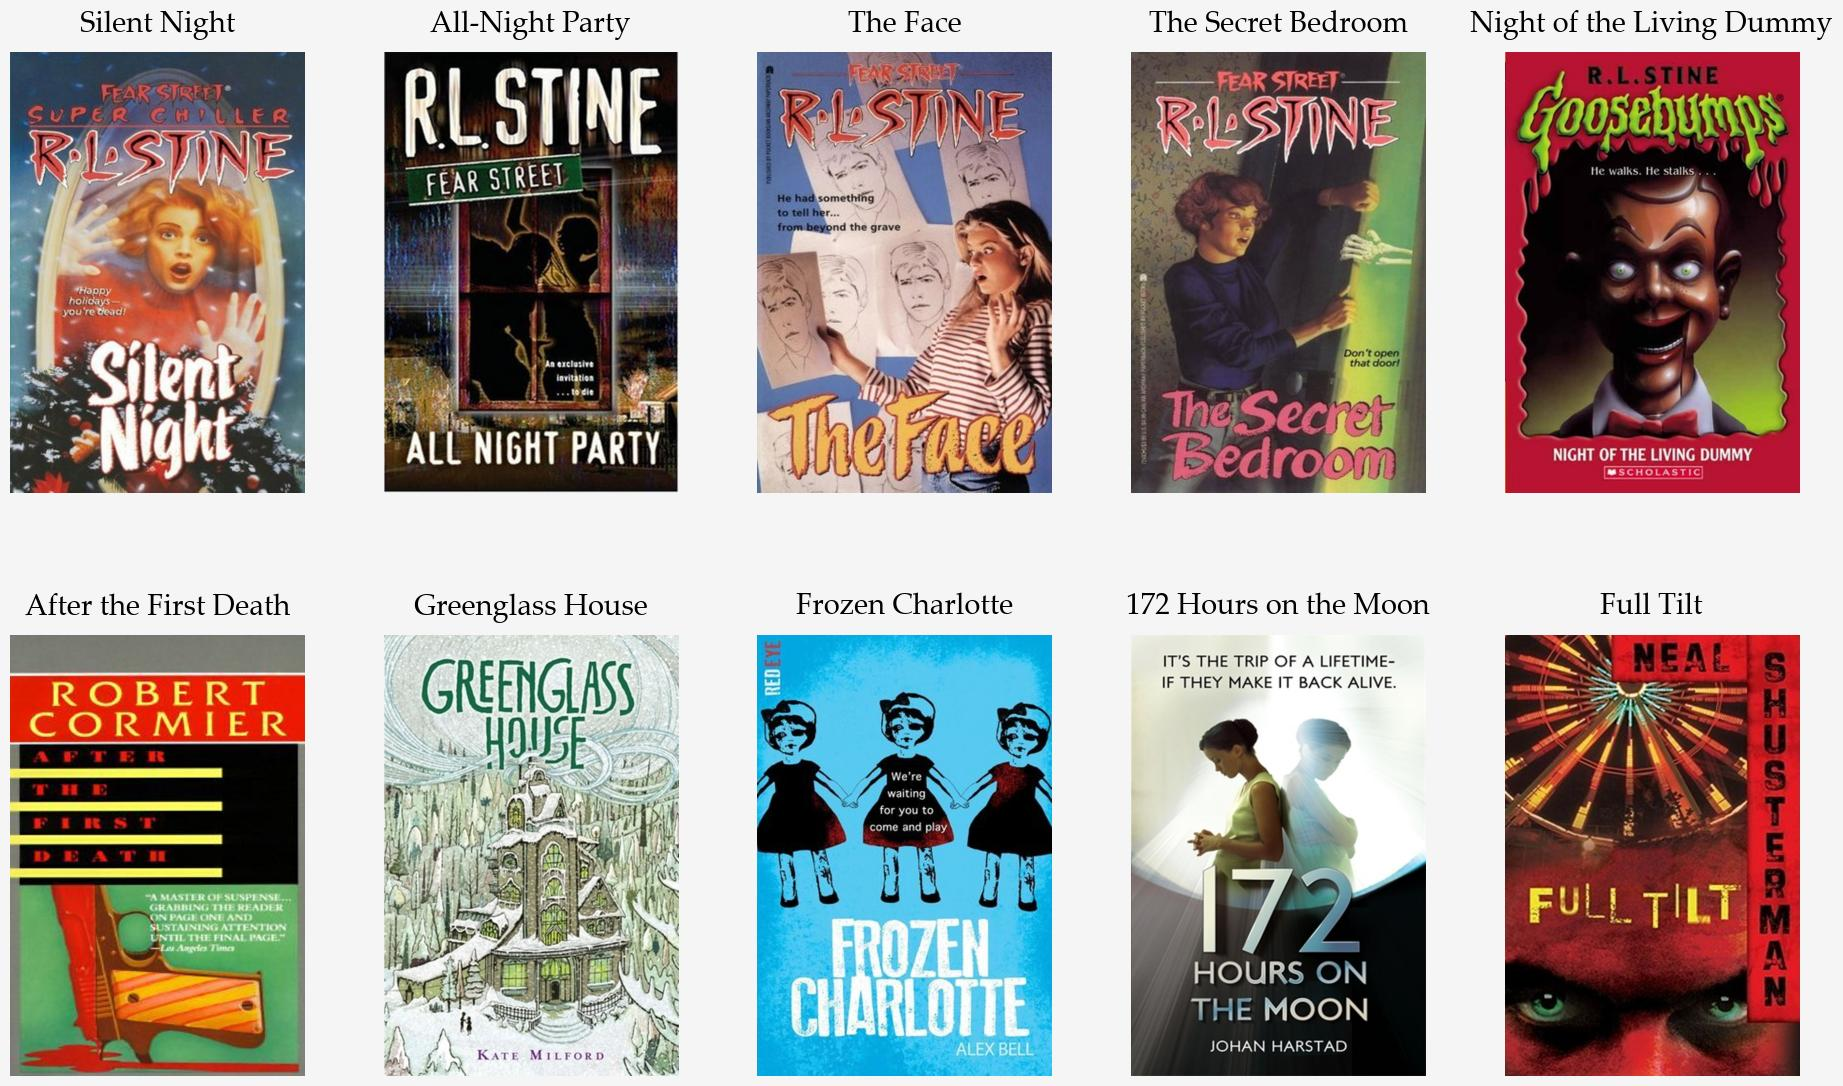


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'The Postman' (by David Brin):


Recommendation
1   This Is The Way The World Ends (by James K. Morrow)
2                The Gone-Away World (by Nick Harkaway)
3                   Earth Abides (by George R. Stewart)
4                          Alas, Babylon (by Pat Frank)
5            Farnham's Freehold (by Robert A. Heinlein)
6                        Swan Song (by Robert McCammon)
7                   The White Plague (by Frank Herbert)
8                                  Wool (by Hugh Howey)
9    Go-Go Girls of the Apocalypse (by Victor Gischler)
10                     Dies the Fire (by S.M. Stirling)

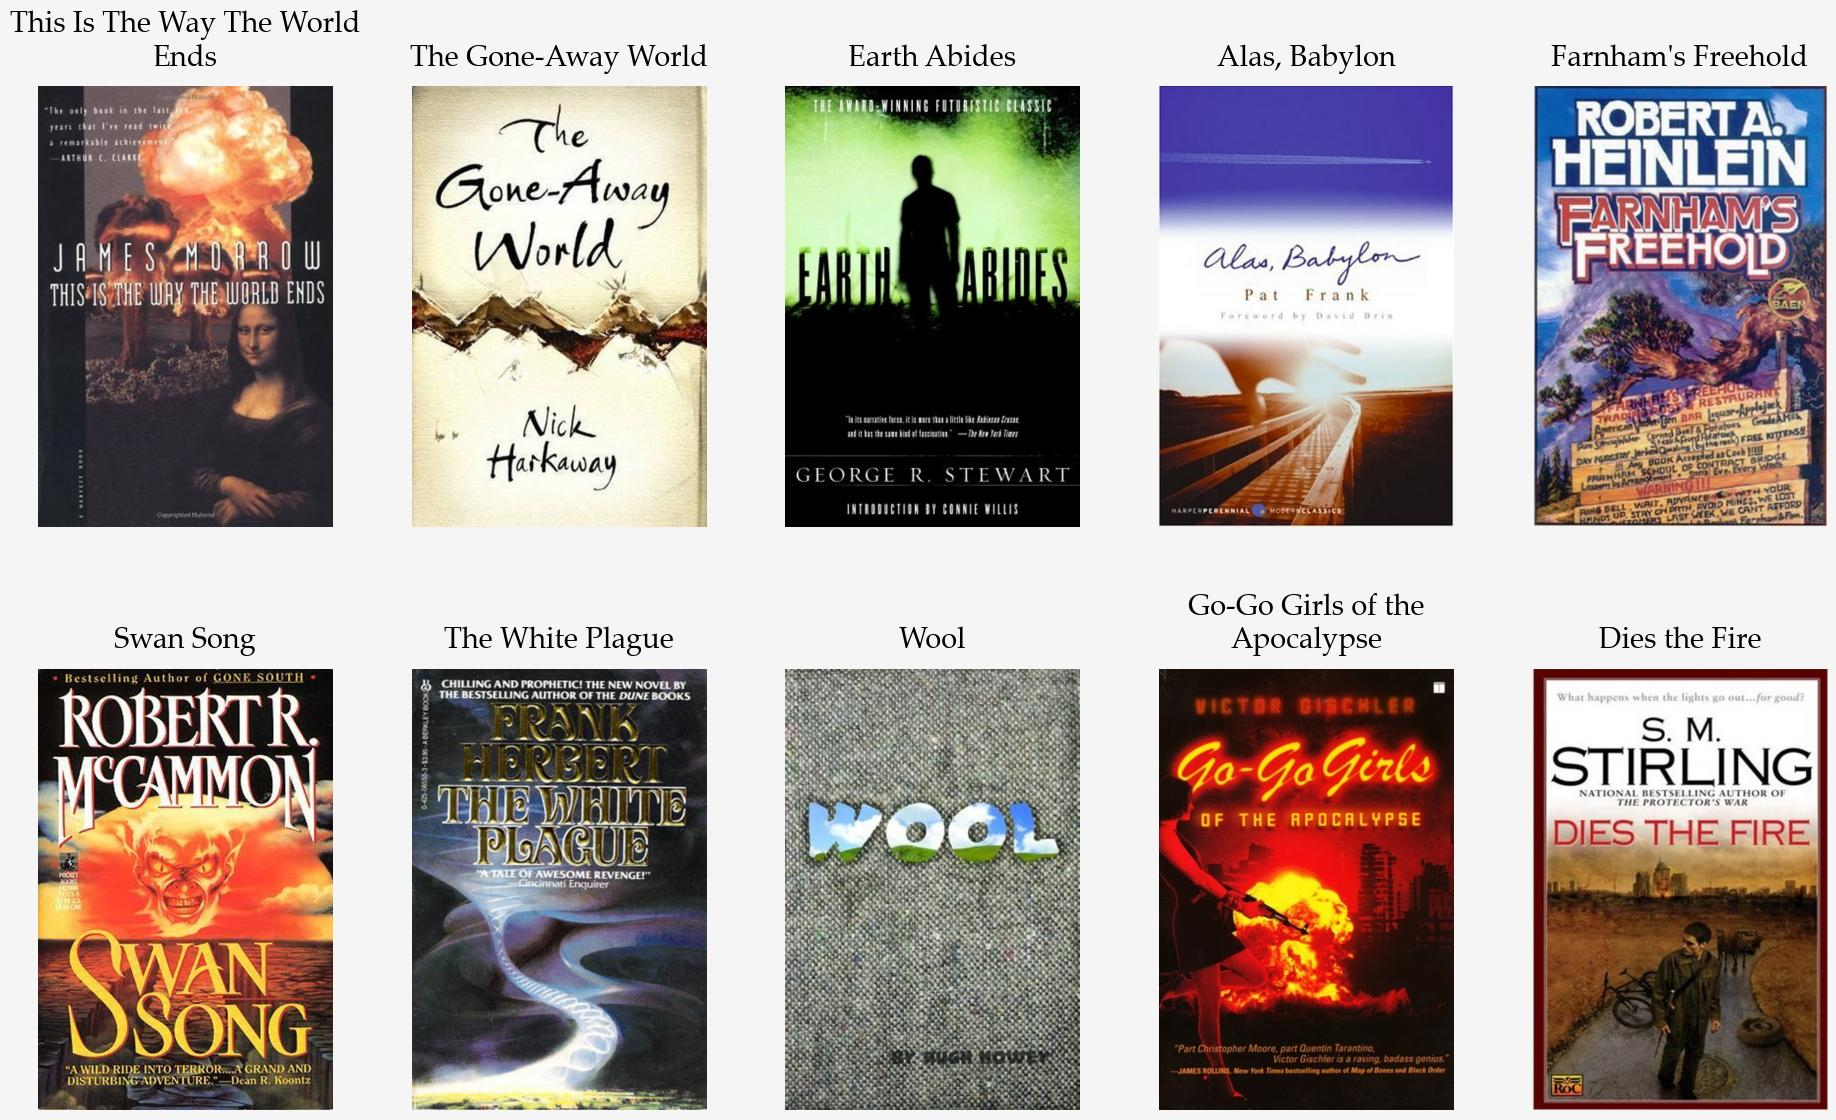


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'The Black Circle' (by Patrick Carman):


Recommendation
1                 Beyond the Grave (by Jude Watson)
2                 One False Note (by Gordon Korman)
3              The Viper's Nest (by Peter Lerangis)
4   Into the Gauntlet (by Margaret Peterson Haddix)
5               The Sword Thief (by Peter Lerangis)
6                      In Too Deep (by Jude Watson)
7             The Emperor's Code (by Gordon Korman)
8                 Storm Warning (by Linda Sue Park)
9               The Maze of Bones (by Rick Riordan)
10          The Ersatz Elevator (by Lemony Snicket)

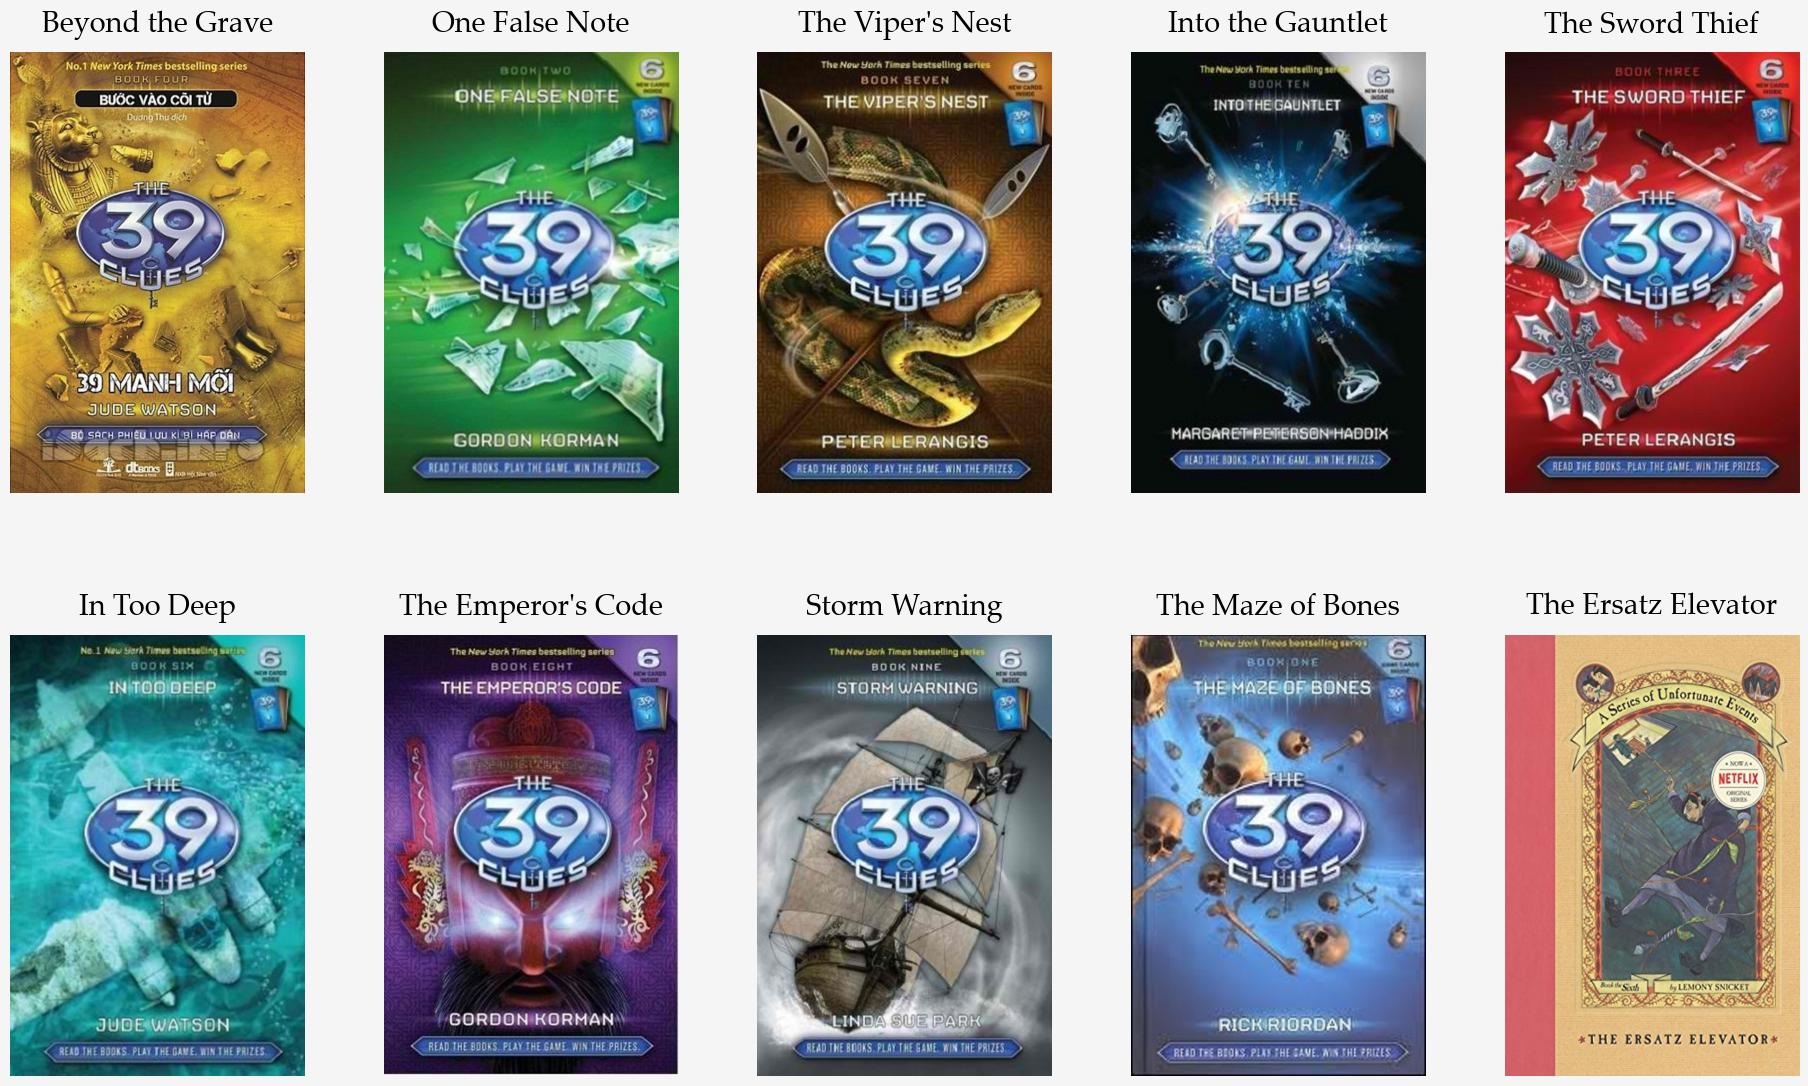


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Chase The Dark' (by Annette Marie):


Recommendation
1               Demons at Deadnight (by A.  Kirk)
2    Stone Cold Touch (by Jennifer L. Armentrout)
3              Immortal Beloved (by Cate Tiernan)
4           Dead Man Rising (by Lilith Saintcrow)
5      The Gathering Darkness (by Lisa Collicutt)
6                    If I Die (by Rachel Vincent)
7      White Hot Kiss (by Jennifer L. Armentrout)
8           Carrier of the Mark (by Leigh Fallon)
9   Every Last Breath (by Jennifer L. Armentrout)
10            The Indigo Spell (by Richelle Mead)

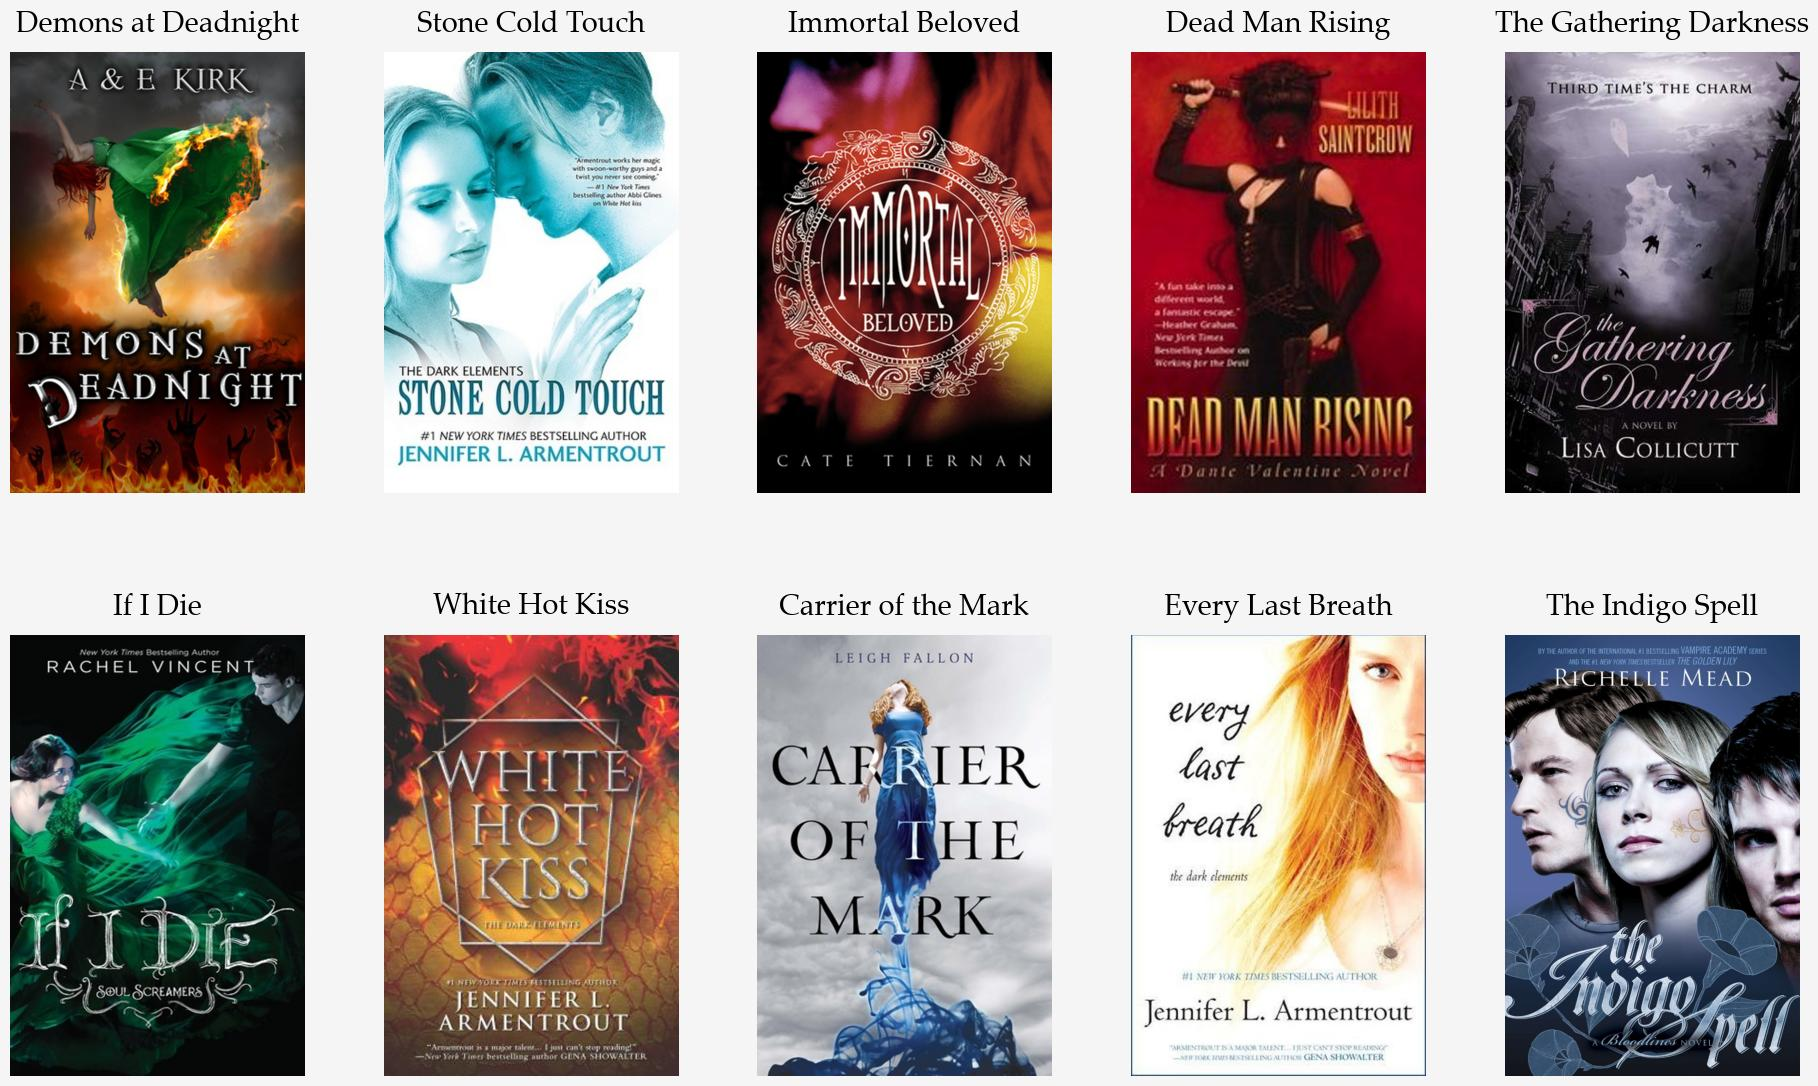


 ______________________________________________________________________________________________________________________________________________________



In [56]:
#Get recommendations for titles chosen at random
random_titles = df.sample(5)[['book_title','author']]

#get recommendations for the selected titles
for title,author in zip(random_titles.iloc[:,0],random_titles.iloc[:,1]):
    Get_Recommendations(title, similarity_mtrx, genre_sim_mtrx, alpha=0.7, N=10)
    print('\n', 150*'_' + '\n')


<br><br>

**Generating Book Recommendations from User Input**

In [60]:
#Defining custom function that requests a book title from the user and returns relevant book recommendations
def Get_Recommendations_fromUser():
    while True:
        book_title = input('\nEnter book title: ')     
        recommendations = Get_Recommendations(book_title, similarity_mtrx, genre_sim_mtrx, alpha=0.7, N=10)
        print('\n', 150*'_' + '\n', flush=True)
        if recommendations is not False:
            response = str(input('\n\nWould you like to get recommendations for more books? [Yes/no]\n')).lower().strip()
            if response in ['yes', 'y']: 
                continue 
            elif response in ['no', 'n']:
                print('\nThank you for trying the recommender.\nExiting...')
                break
            else: 
                print('\nResponse invalid.\nProcess terminating...')
                break



Recommendations for 'The Great Gatsby' (by F. Scott Fitzgerald):


Recommendation
1   F. Scott Fitzgerald: The Great Gatsby (by Nicolas Tredell)
2               This Side of Paradise (by F. Scott Fitzgerald)
3            The Beautiful and Damned (by F. Scott Fitzgerald)
4         The Love of the Last Tycoon (by F. Scott Fitzgerald)
5                      Great Expectations (by Charles Dickens)
6                                The Pearl (by John Steinbeck)
7                               Ethan Frome (by Edith Wharton)
8                      The Portrait of a Lady (by Henry James)
9                                 Old School (by Tobias Wolff)
10                   A Tale of Two Cities (by Charles Dickens)

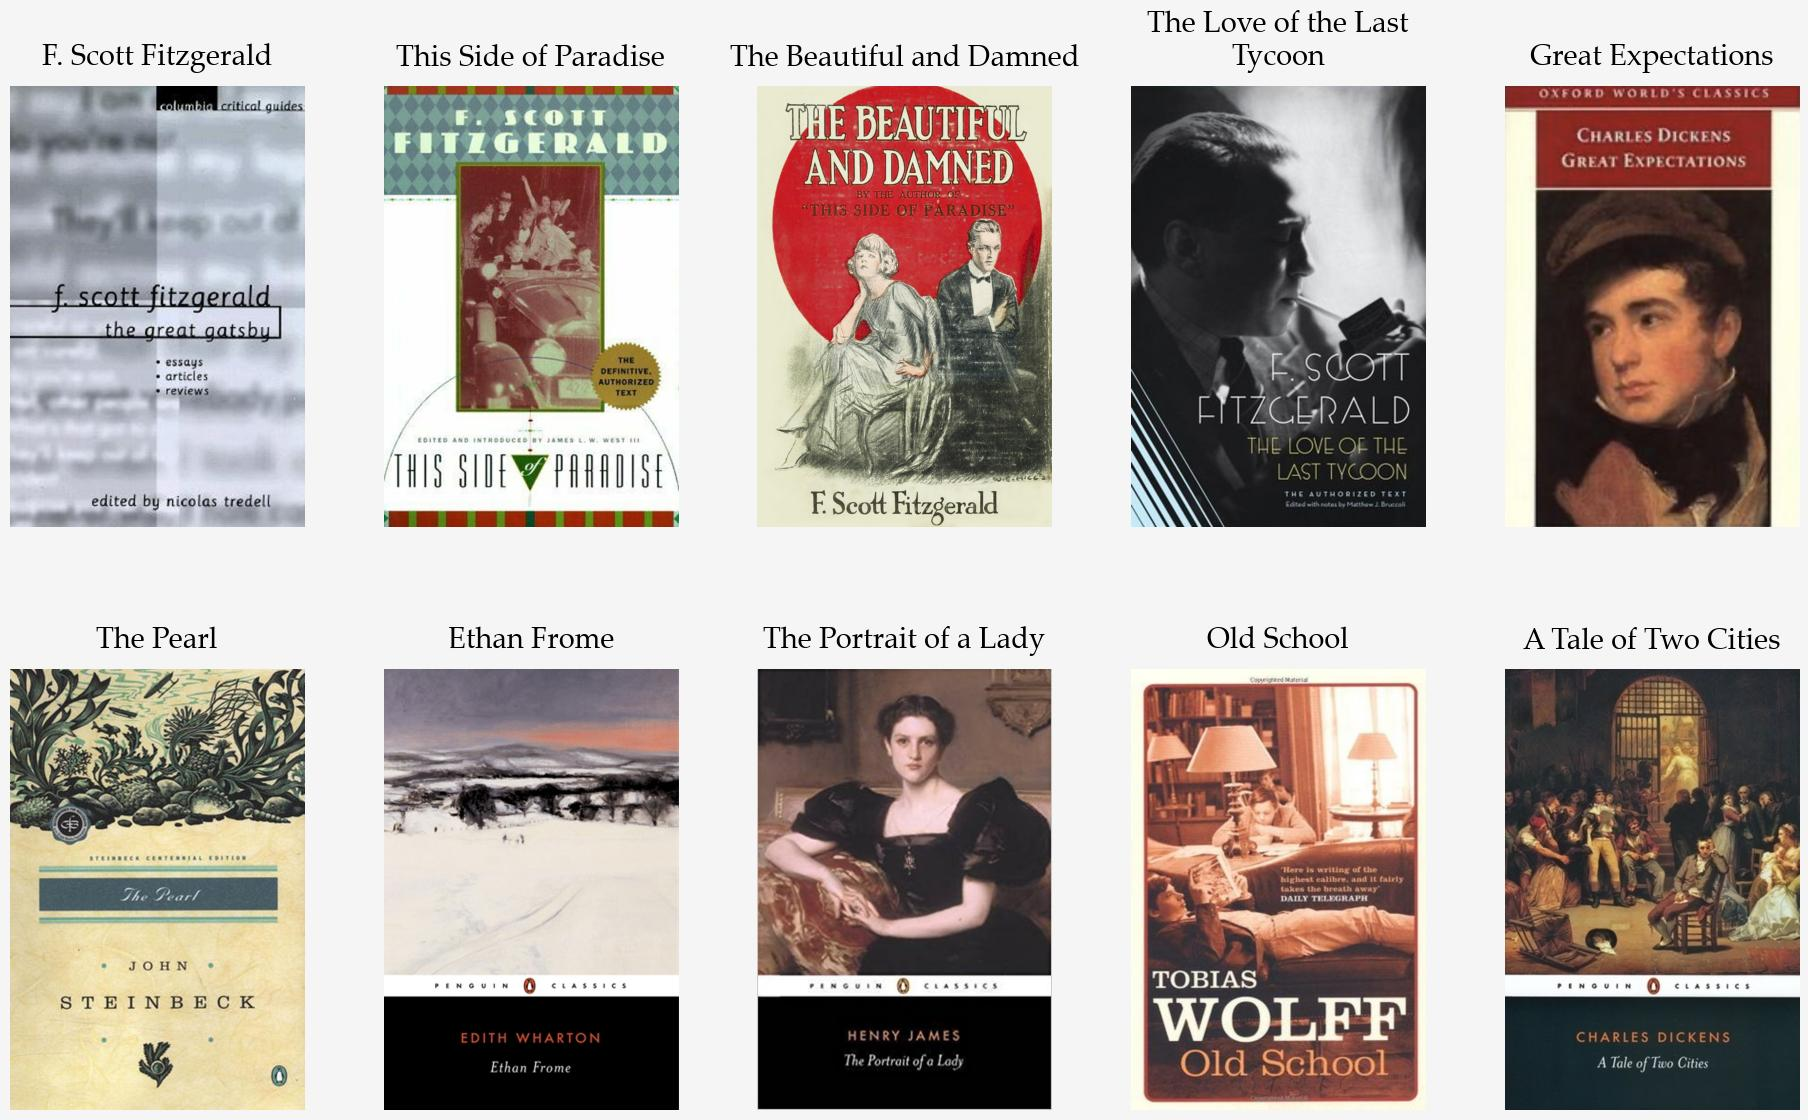


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Return Of The King' (by J.R.R. Tolkien):


Recommendation
1                                                          The Two Towers (by J.R.R. Tolkien)
2   J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings (by J.R.R. Tolkien)
3                                              The Fellowship of the Ring (by J.R.R. Tolkien)
4                                                   The Lord of the Rings (by J.R.R. Tolkien)
5                                                                     Orcs (by Stan Nicholls)
6                                                   The Children of Húrin (by J.R.R. Tolkien)
7                                                               New Spring (by Robert Jordan)
8                                                           The Great Hunt (by Robert Jordan)
9                                                        The Shadow Rising (by Robert Jordan)
10                                                    The Eye of the World (by Robert Jordan)

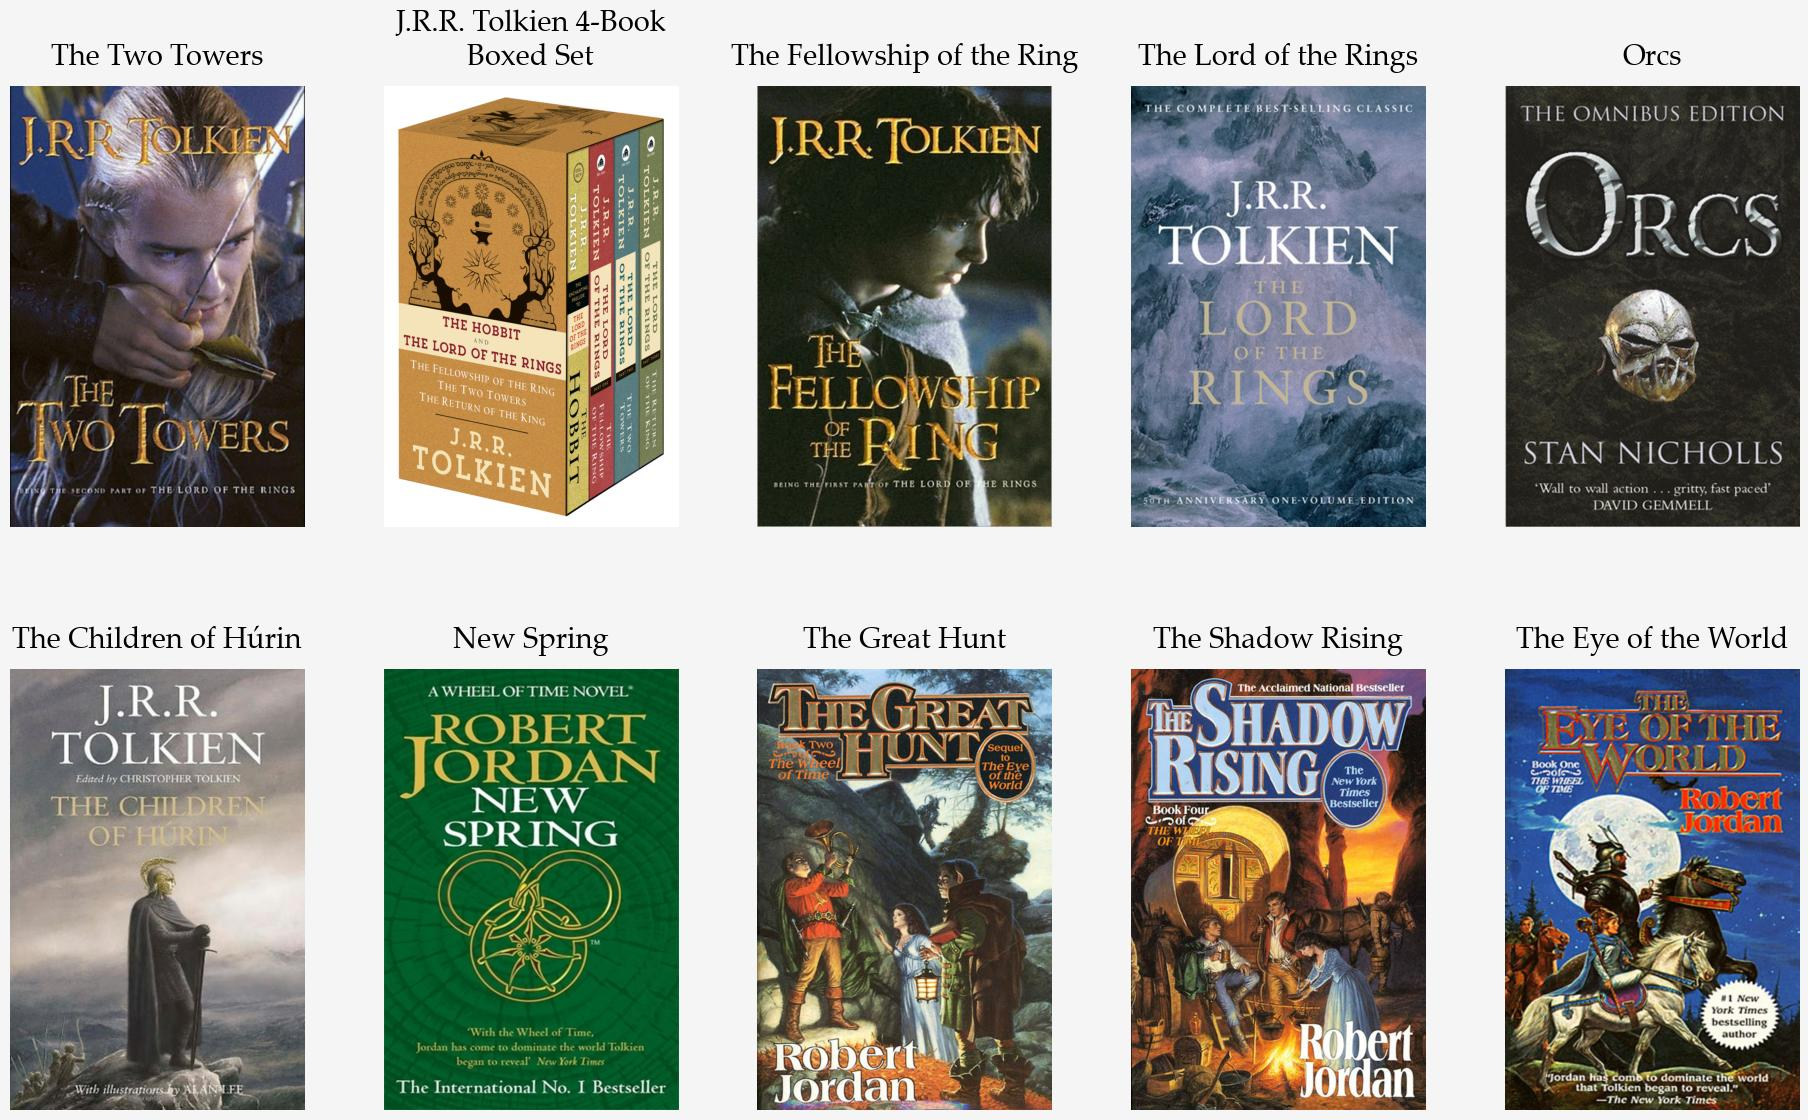


 ______________________________________________________________________________________________________________________________________________________


Book with title 'Atomic Habit' is not found. Please try a different book.


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Atomic Habits' (by James Clear):


Recommendation
1                                                                                 The Power of Habit: Why We Do What We Do in Life and Business (by Charles Duhigg)
2                                                                                Better Than Before: Mastering the Habits of Our Everyday Lives (by Gretchen Rubin)
3                                                                                       Deep Work: Rules for Focused Success in a Distracted World (by Cal Newport)
4                                                              Eat That Frog! 21 Great Ways to Stop Procrastinating and Get More Done in Less Time (by Brian Tracy)
5   13 Things Mentally Strong People Don't Do: Take Back Your Power, Embrace Change, Face Your Fears, and Train Your Brain for Happiness and Success (by Amy Morin)
6                                                  How Women Rise: Break the 12 Habits Holding You Back from Your Next Raise, Promotion, or Job (by Sally Helgesen)
7                                                                The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change (by Stephen R. Covey)
8                                                                                      Getting Things Done: The Art of Stress-Free Productivity (by David    Allen)
9                                                           You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life (by Jen Sincero)
10                                       Building a Second Brain: A Proven Method to Organize Your Digital Life and Unlock Your Creative Potential (by Tiago Forte)

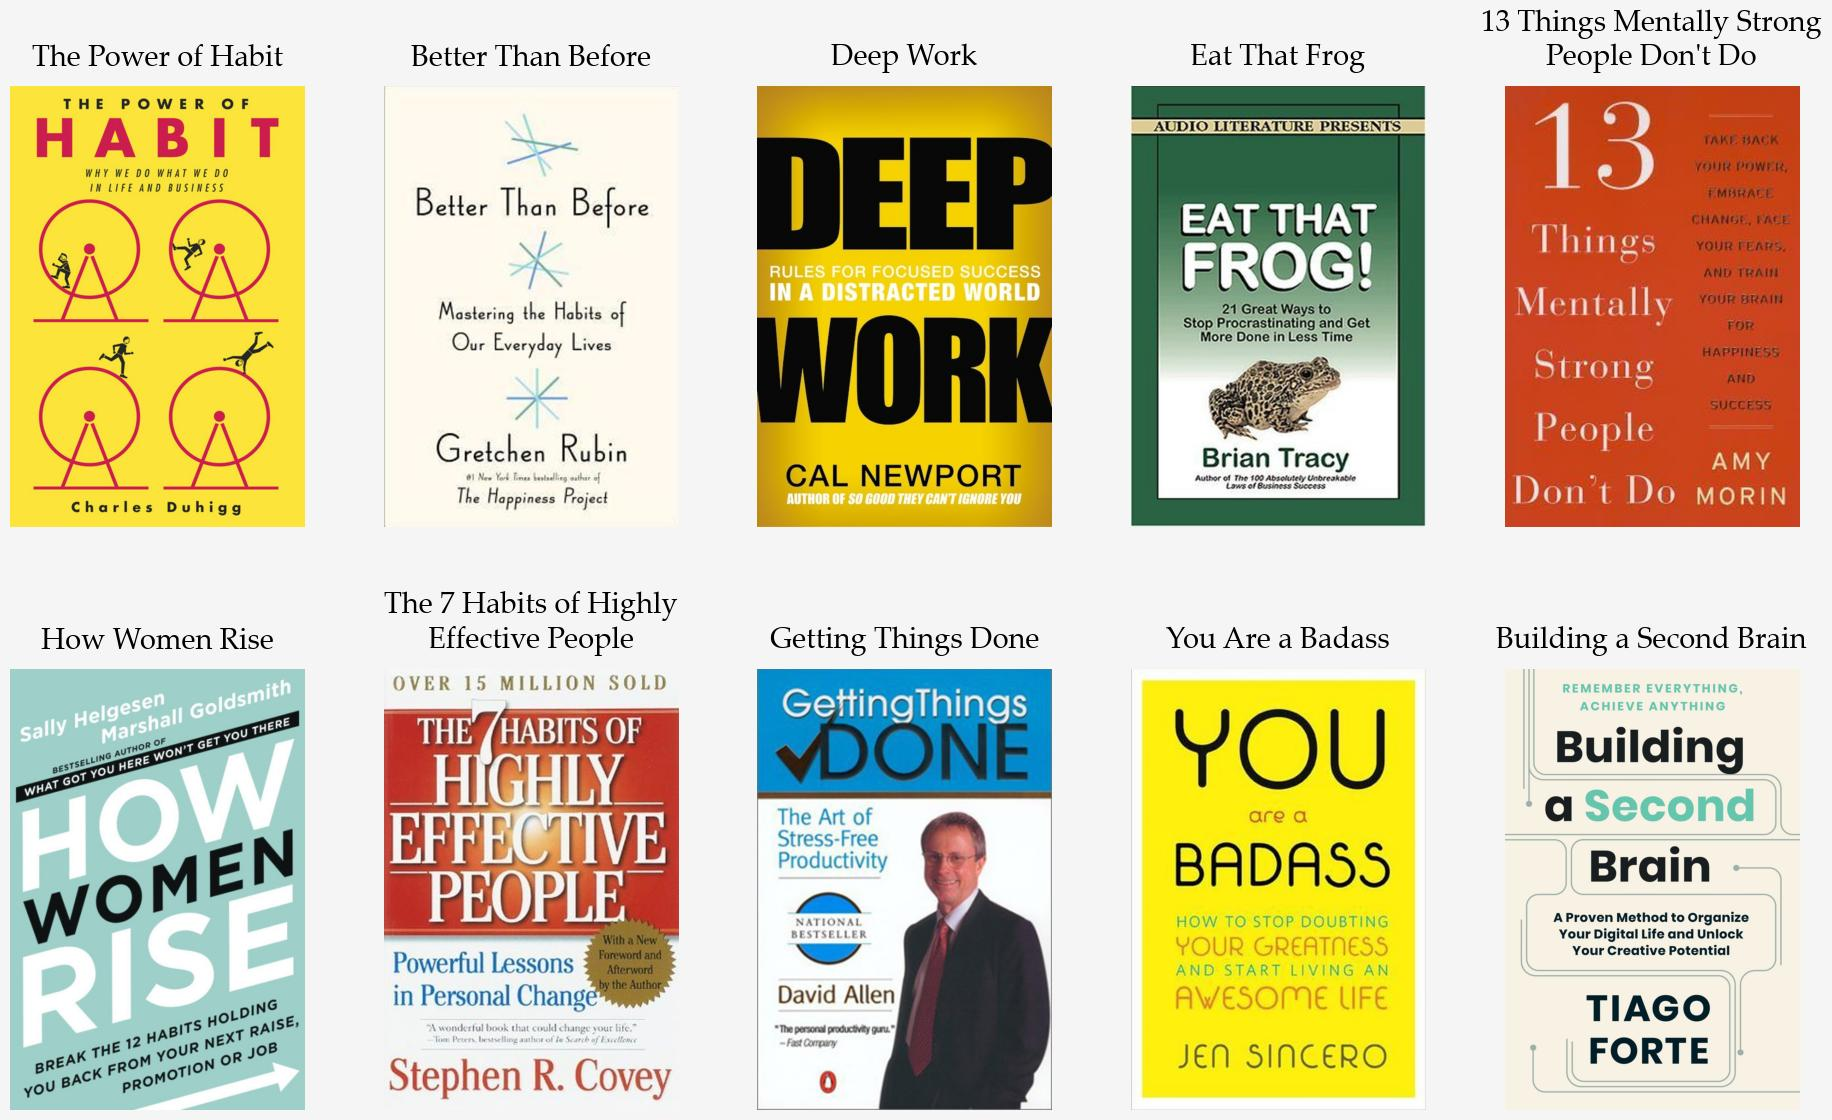


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'A Brief History Of Time' (by Stephen Hawking):


Recommendation
1                                                                   A Briefer History of Time (by Stephen Hawking)
2                                                                  The Universe in a Nutshell (by Stephen Hawking)
3                                        Black Holes & Time Warps: Einstein's Outrageous Legacy (by Kip S. Thorne)
4                                                                            The Grand Design (by Stephen Hawking)
5                                                                               Wrinkles in Time (by George Smoot)
6    Parallel Worlds: A Journey through Creation, Higher Dimensions, and the Future of the Cosmos (by Michio Kaku)
7                                  The Principia : Mathematical Principles of Natural Philosophy (by Isaac Newton)
8   The Elegant Universe: Superstrings, Hidden Dimensions, and the Quest for the Ultimate Theory (by Brian Greene)
9                   Billions & Billions: Thoughts on Life and Death at the Brink of the Millennium (by Carl Sagan)
10                             The Fabric of the Cosmos: Space, Time, and the Texture of Reality (by Brian Greene)

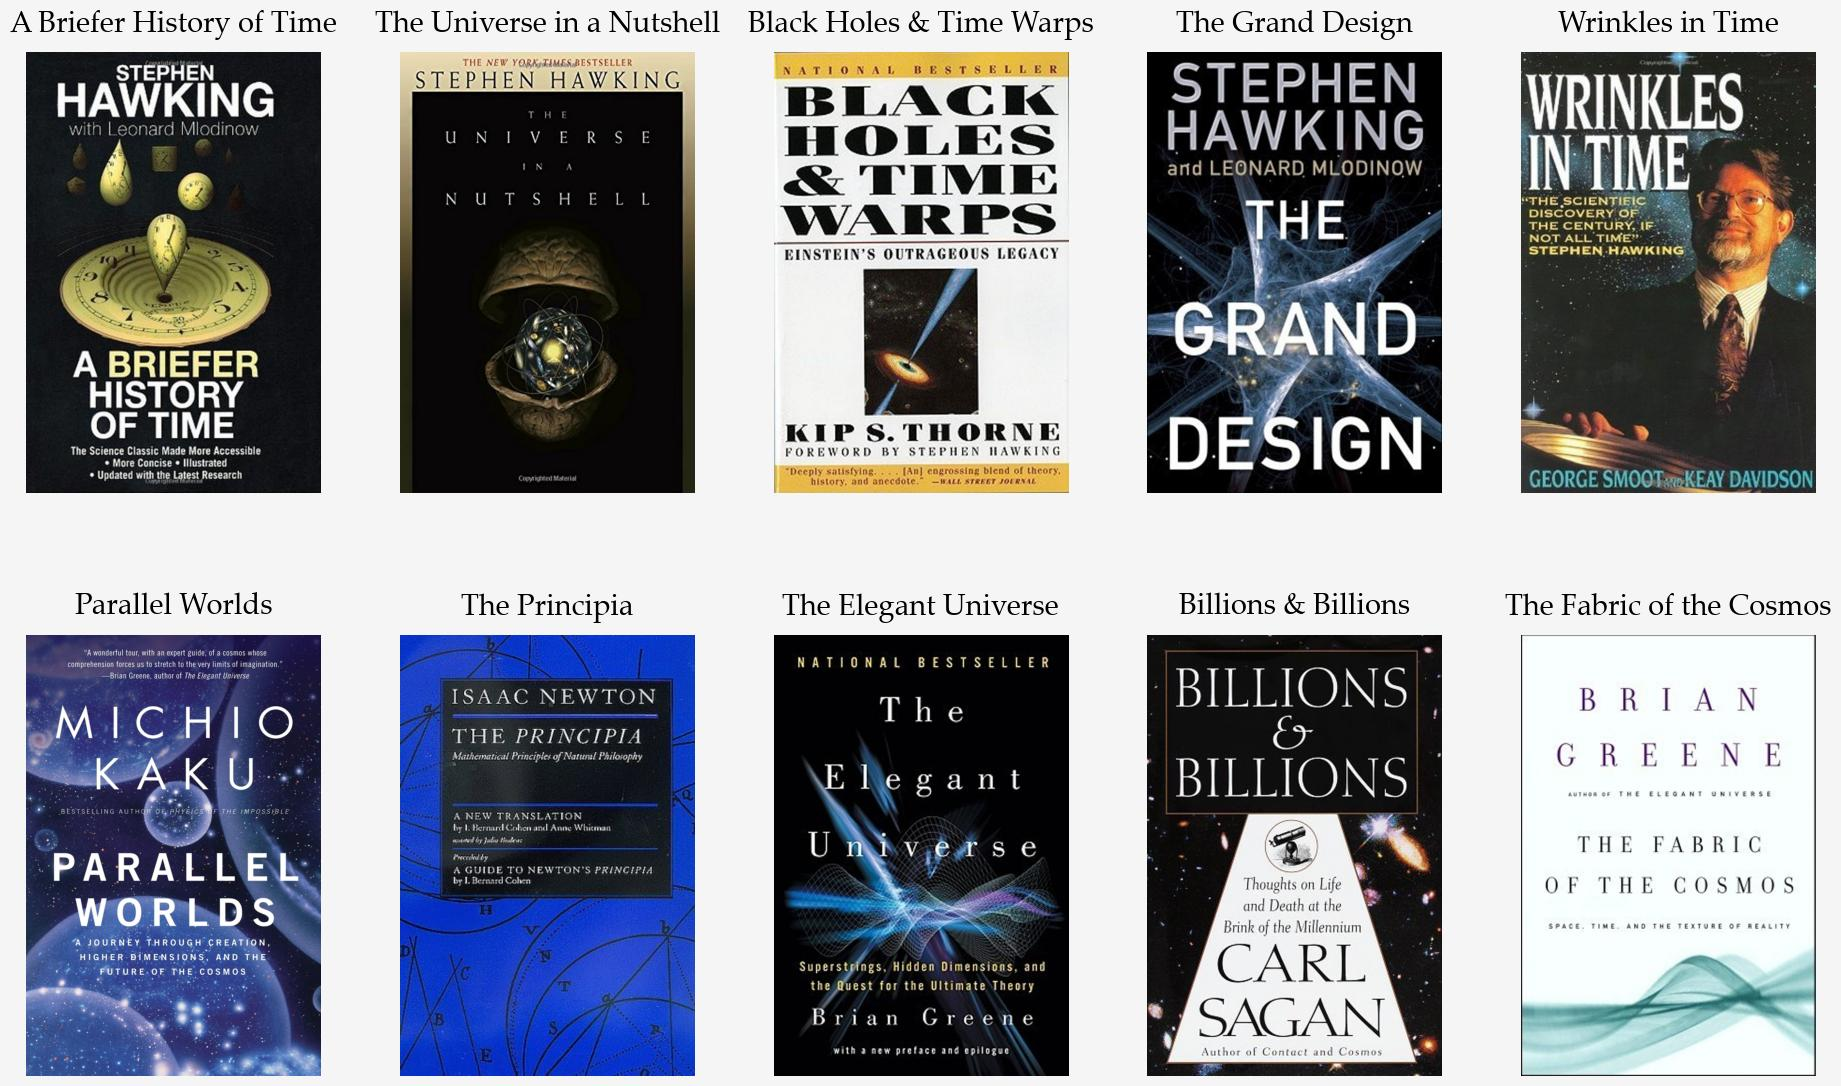


 ______________________________________________________________________________________________________________________________________________________


Recommendations for 'Critique Of Pure Reason' (by Immanuel Kant):


Recommendation
1                             Groundwork of the Metaphysics of Morals (by Immanuel Kant)
2                             Phenomenology of Spirit (by Georg Wilhelm Friedrich Hegel)
3                                                   Being and Time (by Martin Heidegger)
4         Individuals: An Essay in Descriptive Metaphysics (by Peter Frederick Strawson)
5                              An Enquiry Concerning Human Understanding (by David Hume)
6                                              100 Questions About God (by J. Edwin Orr)
7                              Our Knowledge of the External World (by Bertrand Russell)
8                                          Difference and Repetition (by Gilles Deleuze)
9   Beyond Good and Evil: Prelude to a Philosophy of the Future (by Friedrich Nietzsche)
10                       On the Genealogy of Morals / Ecce Homo (by Friedrich Nietzsche)

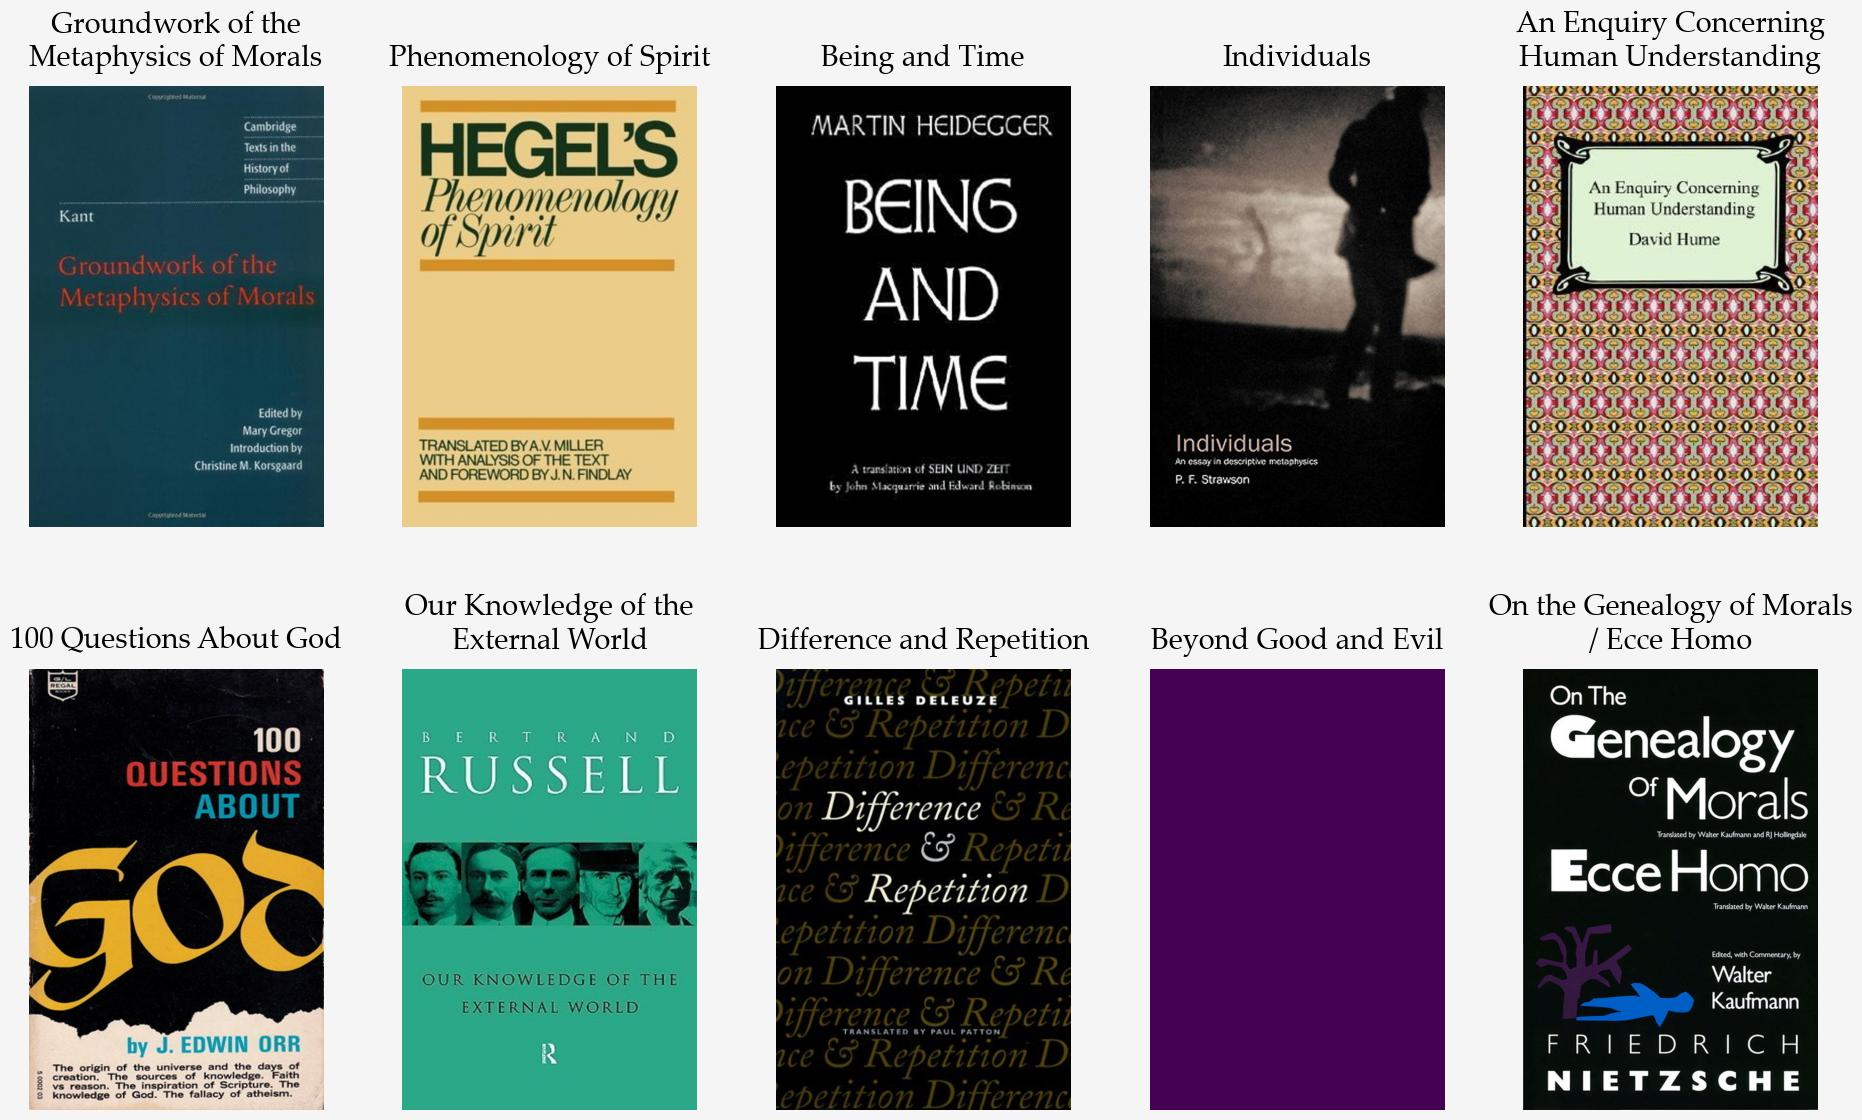


 ______________________________________________________________________________________________________________________________________________________


Thank you for trying the recommender.
Exiting...


In [61]:
#Execute the user recommender function
Get_Recommendations_fromUser()  # The Great Gatsby; Return of the king; Atomic Habit; Atomic Habits; a brief history of time; Critique of pure reason


<br><br>